<a href="https://colab.research.google.com/github/shanberochka/Mathematical_Statistic_Stepic_Course/blob/main/Stepic_MS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import boxplot
from seaborn import distplot
import random
from seaborn import distplot
from scipy import stats
from numpy.linalg import inv

In [ ]:
sample = [18.23, 18.62, 18.09, 18.32, 20.38, 18.27, 19.68, 18.45, 17.74, 17.23, 18.15, 17.67, 17.6, 17.66, 19.92, 17.48, 18.87, 16.67, 18.49, 17.72, 17.08, 16.86, 16.86, 18.28, 17.83, 19.05, 18.4, 17.12, 17.05, 18.0, 18.65, 16.47, 17.0, 18.0, 17.14, 17.9, 18.53, 18.1, 17.52, 18.99]
len(sample)

40

In [ ]:
l1=l2=l3=l4=l5=l6=l7=l8=0
for x in sample:
  if x>=15 and x<=15.75:
    l1 += 1
  elif x>15.75 and x<=16.5:
    l2 += 1
  elif x>16.5 and x<=17.25:
    l3 += 1
  elif x>17.25 and x<=18.0:
    l4 += 1
  elif x>18.00 and x<=18.75:
    l5 += 1
  elif x>18.75 and x<=19.5:
    l6 += 1
  elif x>19.5 and x<=20.25:
    l7 += 1
  elif x>20.25 and x<=21.0:
    l8 += 1
N = len(sample)
print(l1/N, l2/N, l3/N, l4/N, l5/N, l6/N, l7/N, l8/N)

0.0 0.025 0.225 0.275 0.325 0.075 0.05 0.025


In [ ]:
SP_degrees = [23, 24, 21, 23, 22, 21, 20, 21, 28, 25, 22, 22, 25, 21]

In [ ]:
sorted(SP_degrees)

[20, 21, 21, 21, 21, 22, 22, 22, 23, 23, 24, 25, 25, 28]

In [ ]:
len(SP_degrees)

14

## Make dictionary from the list. The keys are unique values from the list, according value is a list with absolute and relative numbers.

In [ ]:
def get_dict(X):
  value_freq_dict = {}
  for x in X:
    if x in value_freq_dict.keys():
      value_freq_dict[x][0]+=1
    else:
      value_freq_dict[x]=[]
      value_freq_dict[x].append(1)
  for x in value_freq_dict.keys():
    value_freq_dict[x].append(value_freq_dict[x][0]/len(X))
  return value_freq_dict

In [ ]:
SP_dict = get_dict(SP_degrees)
SP_dict

{20: [1, 0.07142857142857142],
 21: [4, 0.2857142857142857],
 22: [3, 0.21428571428571427],
 23: [2, 0.14285714285714285],
 24: [1, 0.07142857142857142],
 25: [2, 0.14285714285714285],
 28: [1, 0.07142857142857142]}

## Calculate mean using dictionary

In [ ]:
def get_mean(X_dict):
  mean = 0
  for x in X_dict.keys():
    mean += x*X_dict[x][1]
  return mean

## Calculate a raw moment using dictonary

In [ ]:
def get_raw_moment(X_dict, k):
  k_row_moment = 0
  for x in X_dict.keys():
    k_row_moment += x**k*X_dict[x][1]
  return k_row_moment

## Calculate dispersion using dictionary and mean

In [ ]:
def get_disp(X_dict, mean):
  disp = 0
  for x in X_dict.keys():
    disp+=(x-mean)**2*X_dict[x][1]
  return disp

## Calculate skewness coefficient

In [ ]:
def get_skewness(X_dict, X_mean):
  X_third_moment = get_moment(X_dict, X_mean, 3)
  X_std = get_disp(X_dict, X_mean)**0.5
  return X_third_moment/X_std**3

## Calculate kurtosis coefficient

In [ ]:
def get_kurtosis(X_dict, X_mean):
  X_fourth_moment = get_moment(X_dict, X_mean, 4)
  X_std = get_disp(X_dict, X_mean)**0.5
  return X_fourth_moment/X_std**4 - 3

## Calculate q-quantile

In [ ]:
def get_quantile(X, q):
  n = len(X)
  X_var_series = sorted(X)
  return X_var_series[int(n*q)+1-1]

## Calculate n-moment

In [ ]:
def get_moment(X_dict, X_mean, n):
  n_moment = 0
  for x in X_dict.keys():
    n_moment += (x-X_mean)**n*X_dict[x][1]
  return n_moment

## Calculate median

In [ ]:
def get_median(X):
  X_var_series = sorted(X)
  n = len(X)
  if n%2==0:
    k = int(n/2)
    return (X_var_series[k-1]+X_var_series[k+1-1])/2
  else:
    k = int((n-1)/2)
    return X_var_series[k+1-1]

## Calculate correlation

In [ ]:
def get_correlation(X, Y, mean_X, mean_Y, disp_X, disp_Y):
  n= len(X)
  return (sum([x*y for x, y in zip(X, Y)])/n - mean_X*mean_Y)/(disp_X * disp_Y)**0.5

### Calculations of mean, dispersion, first and third quantiles, median for Sant-Petersburg values

In [ ]:
SP_mean = get_mean(SP_dict)
SP_disp = get_disp(SP_dict, SP_mean)
SP_quantile_25 = get_quantile(SP_degrees, 0.25)
SP_quantile_75 = get_quantile(SP_degrees, 0.75)
SP_median = get_median(SP_degrees)
print(SP_mean, SP_disp, SP_quantile_25, SP_quantile_75, SP_median)

22.714285714285715 4.346938775510204 21 24 22.0


### Calculate the sample characteristics for height, weight and their correlation

In [ ]:
height_weight = [(170, 66), (182, 74),  (183, 77),  (180, 72), (175, 67), (181, 77), (187, 76), (181, 77), (178, 72), (187, 76)]

height_list = [h[0] for h in height_weight]
weight_list = [h[1] for h in height_weight]
height_dict = get_dict(height_list)
weight_dict = get_dict(weight_list)

height_mean = get_mean(height_dict)
weight_mean = get_mean(weight_dict)
height_disp = get_disp(height_dict, height_mean)
weight_disp = get_disp(weight_dict, weight_mean)
height_weight_corr = get_correlation(height_list, weight_list, height_mean, weight_mean, height_disp, weight_disp)

In [ ]:
print(height_mean, weight_mean, height_disp, weight_disp)

180.4 73.39999999999999 24.040000000000003 15.240000000000002


In [ ]:
height_weight_corr

0.8588990018516487

# Задача "13е число"
Правда ли, что пятница 13е неудачный день?

Воспользуйтесь данными из файла  13_6  и попробуйте ответить на вопросы, исходя из данных по числу покупателей по пятницам 6 и 13. Проведите описательный анализ.

Формат файла:

- тип данных,
- год и месяц,
- число покупателей в пятницу 6го,
- число покупателей в пятницу 13го,
- супермаркет

## Loading the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/13_6', sep = '\t', header = None)
df

0                1     2     3               4
0   shopping       1990, July  4942  4882           Epsom
1   shopping  1991, September  4895  4736           Epsom
2   shopping   1991, December  4805  4784           Epsom
3   shopping      1992, March  4570  4603           Epsom
4   shopping   1992, November  4506  4629           Epsom
5   shopping       1990, July  6754  6998       Guildford
6   shopping  1991, September  6704  6707       Guildford
7   shopping   1991, December  5871  5662       Guildford
8   shopping      1992, March  6026  6162       Guildford
9   shopping   1992, November  5676  5665       Guildford
10  shopping       1990, July  3685  3848         Dorking
11  shopping  1991, September  3799  3680         Dorking
12  shopping   1991, December  3563  3554         Dorking
13  shopping      1992, March  3673  3676         Dorking
14  shopping   1992, November  3558  3613         Dorking
15  shopping       1990, July  5751  5993      Chichester
16  shopping  1991, September  5367  5320      Chichester
17  shopping   1991, December  4949  4960      Chichester
18  shopping      1992, March  5298  5467      Chichester
19  shopping   1992, November  5199  5092      Chichester
20  shopping       1990, July  4141  4389         Horsham
21  shopping  1991, September  3674  3660         Horsham
22  shopping   1991, December  3707  3822         Horsham
23  shopping      1992, March  3633  3730         Horsham
24  shopping   1992, November  3688  3615         Horsham
25  shopping       1990, July  4266  4532  East Grinstead
26  shopping  1991, September  3954  3964  East Grinstead
27  shopping   1991, December  4028  3926  East Grinstead
28  shopping      1992, March  3689  3692  East Grinstead
29  shopping   1992, November  3920  3853  East Grinstead
30  shopping       1990, July  7138  6836        Lewisham
31  shopping  1991, September  6568  6363        Lewisham
32  shopping   1991, December  6514  6555        Lewisham
33  shopping      1992, March  6115  6412        Lewisham
34  shopping   1992, November  5325  6099        Lewisham
35  shopping       1990, July  6502  6648       Nine Elms
36  shopping  1991, September  6416  6398       Nine Elms
37  shopping   1991, December  6422  6503       Nine Elms
38  shopping      1992, March  6748  6716       Nine Elms
39  shopping   1992, November  7023  7057       Nine Elms
40  shopping       1990, July  4083  4277  Crystal Palace
41  shopping  1991, September  4107  4334  Crystal Palace
42  shopping   1991, December  4168  4050  Crystal Palace
43  shopping      1992, March  4174  4198  Crystal Palace
44  shopping   1992, November  4079  4105  Crystal Palace

## Calculate mean, dispersion, median for customers from 13s

In [ ]:
customers_list_13 = df[3].to_list()
customers_dict_13 = get_dict(customers_list_13)
customers_13_mean = get_mean(customers_dict_13)
customers_13_disp = get_disp(customers_dict_13, customers_13_mean)
customers_13_median = get_median(customers_list_13)
print(customers_13_mean, customers_13_disp, customers_13_median)

5017.000000000001 1345096.088888889 4736


In [ ]:
customers_list_6 = df[2].to_list()

In [ ]:
diff_13_6_list = [x_13 - x_6 for x_13, x_6 in zip(df[3].to_list(),df[2].to_list())]
diff_13_6_dict = get_dict(diff_13_6_list)
diff_13_6_mean = get_mean(diff_13_6_dict)
diff_13_6_kurtosis = get_kurtosis(diff_13_6_dict, diff_13_6_mean)
diff_13_6_skewness = get_skewness(diff_13_6_dict, diff_13_6_mean)
print('diff_13_6_mean=', diff_13_6_mean, 'diff_13_6_kurtosis=', diff_13_6_kurtosis, 'diff_13_6_skewness=',diff_13_6_skewness)

diff_13_6_mean= 46.48888888888889 diff_13_6_kurtosis= 4.96387147481753 diff_13_6_skewness= 1.4723605614659803


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


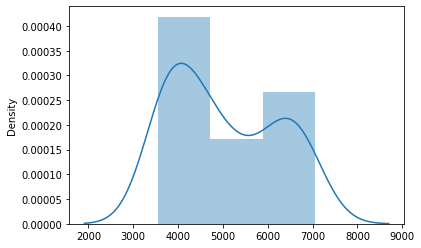

In [ ]:
distplot(customers_list_13, kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


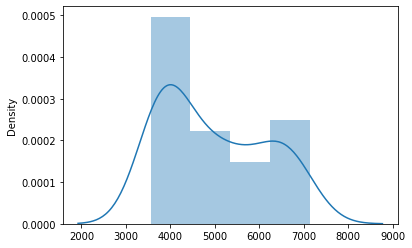

In [ ]:
distplot(customers_list_6, kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


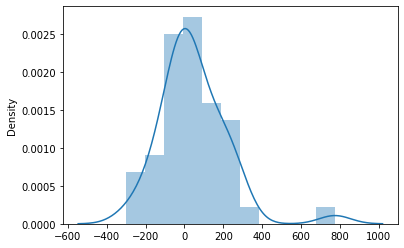

In [ ]:
distplot(diff_13_6_list, kde=True)

(array([9., 5., 4., 4., 3., 2., 1., 3., 0., 3., 4., 4., 3.]),
 array([3554.        , 3823.46153846, 4092.92307692, 4362.38461538,
        4631.84615385, 4901.30769231, 5170.76923077, 5440.23076923,
        5709.69230769, 5979.15384615, 6248.61538462, 6518.07692308,
        6787.53846154, 7057.        ]),
 <a list of 13 Patch objects>)

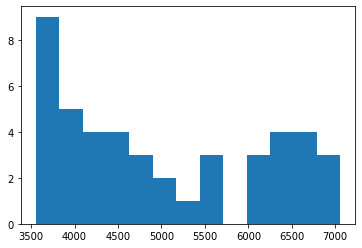

In [ ]:
plt.hist(customers_list_13, bins=int(1+3.2*np.log(len(customers_list_13))))

(array([10.,  6.,  4.,  2.,  2.,  3.,  3.,  2.,  2.,  1.,  5.,  3.,  2.]),
 array([3558.        , 3833.38461538, 4108.76923077, 4384.15384615,
        4659.53846154, 4934.92307692, 5210.30769231, 5485.69230769,
        5761.07692308, 6036.46153846, 6311.84615385, 6587.23076923,
        6862.61538462, 7138.        ]),
 <a list of 13 Patch objects>)

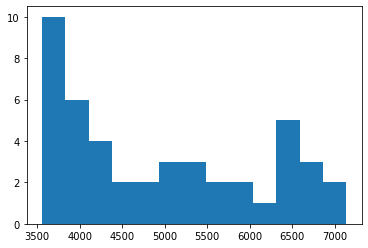

In [ ]:
plt.hist(customers_list_6, bins=int(1+3.2*np.log(len(customers_list_6))))

(array([ 1.,  3.,  7., 14.,  6.,  7.,  5.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([-302.        , -219.23076923, -136.46153846,  -53.69230769,
          29.07692308,  111.84615385,  194.61538462,  277.38461538,
         360.15384615,  442.92307692,  525.69230769,  608.46153846,
         691.23076923,  774.        ]),
 <a list of 13 Patch objects>)

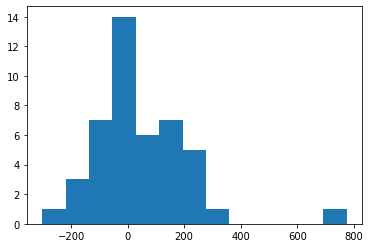

In [ ]:
plt.hist(diff_13_6_list, bins=int(1+3.2*np.log(len(diff_13_6_list))))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


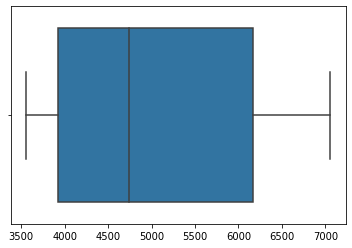

In [ ]:
boxplot(customers_list_13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


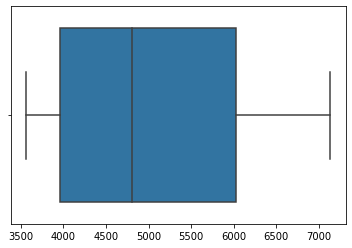

In [ ]:
boxplot(customers_list_6)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


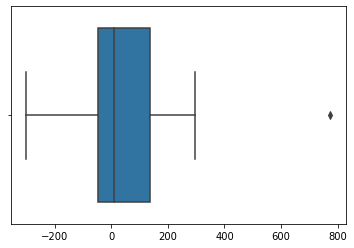

In [ ]:
boxplot(diff_13_6_list)

# Задача "Колледжи"
Какие отличия между исследовательскими университетами и школами искусств?
Используя данные из файла colleges, выдвините предположения о возможных различиях между двумя типами институтов.
Для это проведите описательный анализ исходных данных.  Выдвините несколько гипотез.
Например, "В университеты поступить сложнее (процент принятых меньше)"


Формат файла
*  School -  название школы
*   $/Student  -  Деньги, расходуемые на одного студента в среднем
Top 10% -  % студентов в топ 10% выпускных классов
*   %PhD -  %  факультетов, имеющих PhD
*   Grad%: % студентов, которые успешно завершили обучение
*  Acceptance: - % принятых абитуриентов
*  SAT - медиана объединенных значений Math и Verbal SAT  студентов
School_Type - тип школы (школа искусств  'LibArts', исследовательский университет 'Univ')

In [ ]:
school_dataset = pd.read_csv('/content/drive/MyDrive/Datasets/colleges.gdoc', sep = '\t', header = None)
school_dataset 

OSError: ignored

In [ ]:
f = open('/content/drive/MyDrive/Datasets/colleges.gdoc', 'r')
f.read

OSError: ignored

In [ ]:
sample = [17.4, 19.9, 19.9, 19.0, 20.7, 18.2, 18.6, 20.3, 21.7, 20.8, 16.7, 20.3, 22.5, 18.3, 21.1, 16.3, 22.0, 19.5, 18.1, 21.1, 20.0, 21.6, 21.5, 21.1, 23.3, 23.0, 17.8, 19.5, 21.6, 22.9]
sample_dict = get_dict(sample)
sample_mean = get_mean(sample_dict)
sample_second_raw_moment = get_raw_moment(sample_dict, 2)
sample_disp = get_disp(sample_dict, sample_mean)
print(sample_mean, sample_second_raw_moment, sample_disp)

20.156666666666663 409.705 3.413788888888888


In [ ]:
def factorial(n):
  if n == 1 or n == 0:
    return 1
  else:
    return n*factorial(n-1)

In [ ]:
sample_second_raw_moment - sample_mean**2 

3.41378888888903

In [ ]:
np.log([1, 2, 3])

array([0.        , 0.69314718, 1.09861229])

In [ ]:
def log_likelihood_pois(sample, lmbd):
  n = len(sample)
  return n*(-lmbd) + np.log(lmbd)*sum(sample) - sum(np.log([factorial(x) for x in sample]))

In [ ]:
sample = [2,  1,  0,  0,  1]
log_likelihood_pois = log_likelihood_pois(sample, 3)
print(log_likelihood_pois)

-11.298698025887505


In [ ]:
def likelihood_unimod(sample):
  sample_sorted = sorted(sample)
  max = -1
  argmax = sample[0]
  n = len(sample)
  for x in sample:
    if x != 0:
      if max<abs((1/x)**n):
        max = abs((1/x)**n)
        argmax = x
  return max, argmax

In [ ]:
sample = [-12.8, -8.85, -13.45, -5.17, -12.11, -16.13, -7.57, -1.64, -8.91, -6.62]
print(likelihood_unimod(sample))

(0.007104958074030277, -1.64)


In [ ]:
sample = [-3.07, -11.64, -0.04, -14.33, -12.34, -2.02, -5.68, -12.7, -12.27, -14.38, -9.18, -0.65, -0.45, -7.55, -9.21, -14.34, -6.38, -4.43, -7.87, -4.65]
sorted(sample)

[-14.38,
 -14.34,
 -14.33,
 -12.7,
 -12.34,
 -12.27,
 -11.64,
 -9.21,
 -9.18,
 -7.87,
 -7.55,
 -6.38,
 -5.68,
 -4.65,
 -4.43,
 -3.07,
 -2.02,
 -0.65,
 -0.45,
 -0.04]


Рассмотрим следующий эксперимент, имитирующий поведение пользователя  при поиске информации в поисковой системе:

Пользователь последовательно просматривает документы до тех пор, пока не найдет нужную информацию или не устанет.  Вероятность того, что пользователь найдет информацию в документе с номером i равна p, вероятность того, что он не найдет информацию в документе i равна (1-p). Вероятность p не зависит от номера документа. Вероятность того, что пользователь устанет после просмотра i-го документа равна g, соответственно продолжит поиски с вероятностью (1−g). Данная вероятность не зависит от номера просматриваемого документа. Пользователь всегда просматривает как минимум один документ. При этом нам известно, нашел ли пользователь информацию или нет (F - нашел, N - не нашел)

Наблюдение: число просмотренных документов и факт "найдена информация или нет"

Например,

- наблюдение '2 F' означает, что пользователь просмотрел первый документ, не нашел в нем информацию, не устал,  просмотрел второй документ и нашел в нем информацию.
- наблюдение  '1 N' означает, что пользователь просмотрел первый документ, не нашел в нем информацию и устал, прекратил просматривать документы.

In [ ]:
def get_dict_likelihood_function(sample):
  likelihood_dict = {}
  likelihood_dict['1-p']=likelihood_dict['p']=likelihood_dict['1-g']=likelihood_dict['g']=0
  for x in sample:
    N = x[0]
    if x[-1] == 'F':
      likelihood_dict['1-p'] += N-1
      likelihood_dict['1-g'] += N-1
      likelihood_dict['p'] += 1
    else:
      likelihood_dict['1-p'] += N
      likelihood_dict['1-g'] += N-1
      likelihood_dict['g'] += 1
  return likelihood_dict


In [ ]:
sample = []
with open('/content/sample_2_4.txt') as f:
  for line in f:
    number = int(line[0])
    letter = line[-2:-1]
    sample.append([number, letter])  

In [ ]:
sample

In [ ]:
get_dict_likelihood_function([[3,'N'], [2,'F'], [1,'F']])

{'1-g': 3, '1-p': 4, 'g': 1, 'p': 2}

In [ ]:
def get_dict(X):
  value_freq_dict = {}
  for x in X:
    if x in value_freq_dict.keys():
      value_freq_dict[x][0]+=1
    else:
      value_freq_dict[x]=[]
      value_freq_dict[x].append(1)
  for x in value_freq_dict.keys():
    value_freq_dict[x].append(value_freq_dict[x][0]/len(X))
  return value_freq_dict

In [ ]:
likelihood_dict = get_dict_likelihood_function(sample)

In [ ]:
likelihood_dict

{'1-g': 75, '1-p': 97, 'g': 22, 'p': 78}

In [ ]:
def get_result_likelihood(sample_dict):
  p = sample_dict['p'] /(sample_dict['1-p']+sample_dict['p'])
  g = sample_dict['g'] /(sample_dict['1-g']+sample_dict['g'])
  return p, g

In [ ]:
get_result_likelihood(get_dict_likelihood_function([[3,'N'], [2,'F'], [1,'F']]))

(0.3333333333333333, 0.25)

In [ ]:
get_result_likelihood(likelihood_dict)

(0.44571428571428573, 0.2268041237113402)

# Задача для самостоятельного выполнения (не обязательное)

С помощью моделирования проверьте, **является ли точечная оценка параметра \lambdaλ  экспоненциально распределенной случайной величины, полученная методом максимального правдоподобия, асимптотически нормальной**.

Для этого

* найдите точечную оценку параметра \lambdaλ экспоненциально распределенной случайной величины с помощью методом максимального правдоподобия

* проведите моделирование:
    - задайте параметр \lambdaλ экспоненциально распределенной случайной величины
    - смоделируйте 500 выборок объемом 1000 из генеральной совокупности с выбранным значением параметра  \lambdaλ
    - для каждой (из 500) выборки найдите значение точечной оценки параметра
постройте гистограмму распределения точечных оценок
сделайте вывод
    - увеличьте число моделируемых выборок до 1000 или 5000. Проанализируйте, что изменилось

In [ ]:
def get_exp_sample(n, lmbd):
  sample = []
  for i in range(n):
    u_i = random.random()
    sample.append(-1/lmbd*np.log(1-u_i))
  return sample

In [ ]:
model_1000 = []
for i in range(500):
  model_1000.append(get_exp_sample(1000, 5))

In [ ]:
np.random.exponential(0.2, 10)

array([0.48380676, 0.07060053, 0.31714359, 0.0073278 , 0.0457853 ,
       0.03127362, 0.28205877, 0.06868139, 0.21376518, 0.04470153])

In [ ]:
def get_lmbd_likelihood_estimation(sample):
  n = len(sample)
  return n/(sum(sample))

In [ ]:
lmbd_estimations_1000 = [get_lmbd_likelihood_estimation(sample) for sample in model_1000]
lmbd_estimations_1000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


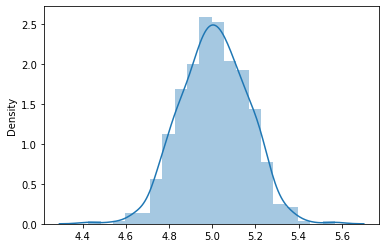

In [ ]:
distplot(a=lmbd_estimations_1000, bins=int(1+3.2*np.log(500)))

In [ ]:
model_5000 = []
for i in range(500):
  model_5000.append(get_exp_sample(5000, 5))

lmbd_estimations_5000 = [get_lmbd_likelihood_estimation(sample) for sample in model_5000]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


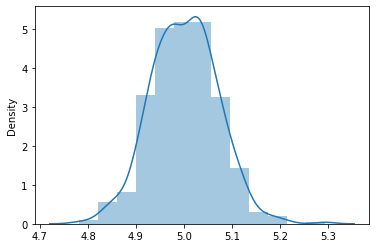

In [ ]:
distplot(a=lmbd_estimations_5000, bins=int(1.72*500**(1/3)))

In [ ]:
def get_mix_mean(sampe_dict):
  mean = 0
  for x in sample_dict:
    mean += sample_dict[x][0]*sample_dict[x][1]
  return mean

In [ ]:
def get_mix_disp(sample_dict, mix_mean):
  disp = 0
  for x in sample_dict:
    disp += sample_dict[x][0]*(sample_dict[x][2]+(sample_dict[x][1]-mix_mean)**2)
  return disp

In [ ]:
sample_dict = {0:[0.3, 3, 1], 1:[0.6, 2, 4], 2:[0.1, 5, 0.01]}
print(get_mix_mean(sample_dict), get_mix_disp(sample_dict, get_mix_mean(sample_dict)))

2.5999999999999996 3.5409999999999995


In [ ]:
strate_1_list = [282, 226, 188, 327, 344, 304, 414, 224, 335, 270]
strate_2_list = [417,  851,  742, 1217, 1160,  993,  864,  852, 1286,  988]
strate_1_dict = get_dict(strate_1_list)
strate_2_dict = get_dict(strate_2_list)
strate_1_mean = get_mean(strate_1_dict)
strate_2_mean = get_mean(strate_2_dict)
strate_1_disp = get_disp(strate_1_dict, strate_1_mean)
strate_2_disp = get_disp(strate_2_dict, strate_2_mean)
sample_dict = {0:[0.4, strate_1_mean, strate_1_disp], 1:[0.6, strate_2_mean, strate_2_disp]}
print(get_mix_mean(sample_dict), get_mix_disp(sample_dict, get_mix_mean(sample_dict)))

678.76 136721.66239999997


In [ ]:
print(strate_1_mean, strate_2_mean)
print(strate_1_disp, strate_2_disp)

291.40000000000003 937.0
4118.24 58404.2


In [ ]:
np.var(strate_2_list)

58404.2

## Доверительные интервалы

### Задача 1
Передположим, что диаметр шариков, изготавливаемых станком-автоматом, подчиняется нормальному закону распределения. В  выборке  из 16  шариков средний  диаметр  оказался  равным  10.3 мм,   а  несмещенная оценка дисперсии - 1.21мм^2.

- Постройте доверительный интервал для математического ожидания, если \α=0.05.

In [ ]:
def get_mean_confidence_interval_normal(n, mean, bias_disp, alpha):
  return (mean-(bias_disp/n)**0.5*stats.t(df=15).ppf(1-alpha/2), mean+(bias_disp/n)**0.5*stats.t(df=15).ppf(1-alpha/2))

In [ ]:
get_mean_confidence_interval_normal(16, 10.3, 1.21, 0.05)

(9.713851374971187, 10.886148625028815)

In [ ]:
stats.chi.ppf(0.95,df=10)

4.278672463892877

- Постройте 95%-доверительный интервал для дисперсии σ^2 ошибок измерений, если  предполагается, что ошибки измерений подчиняются нормальному закону с мат.ожиданием a=0 и неизвестной дисперсией σ^2.

In [ ]:
def get_disp_confidence_interval_normal(sample, real_mean, alpha):
  n = len(sample)
  S = sum([(x-real_mean)**2 for x in sample])/n
  return (n*S/stats.chi2.ppf(1-alpha/2, df = n), n*S/stats.chi2.ppf(alpha/2, df = n))

In [ ]:
sample = [-1.69, -0.67, -1.15, 0.45, -1.14, -0.83, -1.74, -0.06, -0.17, 1.02, 0.42, -0.1, 0.51, 1.38, 0.65, -0.27, -1.55, -2.41, 1.27, 2.04]
a = 0 
alpha = 1 - 0.95
get_disp_confidence_interval_normal(sample, a, alpha)

(0.8121369402612263, 2.8934463667545023)

### Задача 2
Большая партия изделий может содержать некоторую долю дефектных. Поставщик утверждает, что эта доля составляет 5%, покупатель  предполагает, что доля дефектных изделий равна 10%.

- По предложенной выборке постройте 95%-й приближенный доверительный интервал  для доли брака в партии  и ответьте на вопрос: с большей степенью уверенности можно утверждать, что доля брака  в партии больше 5%? (G - доля брака больше 5%, L - в противном случае)

In [ ]:
sample = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
len(sample)

100

In [ ]:
def get_mean_confidence_interval_ber(sample, alpha):
  n = len(sample)
  mean = np.mean(sample)
  S = (sum([(x-mean)**2 for x in sample])/(n-1))**0.5
  return (mean - S*stats.t(df=n-1).ppf(1-alpha/2)/n**0.5, mean + S*stats.t(df=n-1).ppf(1-alpha/2)/n**0.5)

In [ ]:
get_mean_confidence_interval_ber(sample, 0.05)

(0.006537133781117754, 0.09346286621888225)

In [ ]:
def get_asymp_mean_confidence_interval_ber(sample, alpha):
  mean = np.mean(sample)
  n = len(sample)
  return (mean - stats.norm.ppf(1-alpha/2)*((mean*(1-mean))/n)**0.5, mean + stats.norm.ppf(1-alpha/2)*((mean*(1-mean))/n)**0.5)

In [ ]:
get_asymp_mean_confidence_interval_ber(sample, 0.05)

(0.007283575292052952, 0.09271642470794705)

In [ ]:
sample = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0
]
get_asymp_mean_confidence_interval_ber(sample, 0.05)

(0.1150494442182559, 0.17695055578174407)

In [ ]:
stats.norm.ppf(alpha/2)

-1.6448536269514729

In [ ]:
def get_asymp_mean_confidence_interval_ber(n, m, alpha):
  mean = m/n
  return (mean - stats.norm.ppf(1-alpha/2)*((mean*(1-mean))/n)**0.5, mean + stats.norm.ppf(1-alpha/2)*((mean*(1-mean))/n)**0.5)

In [ ]:
get_asymp_mean_confidence_interval_ber(10000, 4000, 1-0.95)

(0.3903981766472894, 0.40960182335271067)

# 4.2 Критерии о параметрах нормального распределения

In [ ]:
def get_critical_region_and_p_value_norm(sample_mean, sample_s, n, alpha, a_0, mode):
  Z = (sample_mean - a_0)/(sample_s/n)**0.5 #sample statistic
  if mode == 'left':
    t = stats.t(df=n-1).ppf(alpha) #quantile
    p_value = stats.t.cdf(Z, df=n-1)
    print("Critical region for statistic criteria Z: ({},{:0.2f})".format(-np.inf, t))
  elif mode == 'right':
    t = stats.t(df=n-1).ppf(1-alpha) #quantile
    p_value = 1-stats.t.cdf(Z, df=n-1)
    print("Critical region for statistic criteria Z: ({:0.2f},{})".format(t, +np.inf))
  else:
    t1 = stats.t(df=n-1).ppf(alpha/2) #quantile
    t2 = stats.t(df=n-1).ppf(1-alpha/2) #quantile
    p_value = 2*min(stats.t.cdf(Z, df=n-1), 1-stats.t.cdf(Z, df=n-1))
    print("Critical region for statistic criteria Z: ({},{:0.2f}) U ({:0.2f},{})".format(-np.inf, t1, t2, +np.inf))

  print('Z=', Z)

  print("p-value = {:0.3f}".format(p_value))

  if p_value > alpha:# Z didn't get in critical region
    print("Accept H0")
  else:
    print("Decline H0")

In [ ]:
get_critical_region_and_p_value_norm(3.3, 1, 100, 0.1, 3.5, 'left')

In [ ]:
get_critical_region_and_p_value_norm(14.4, 2.915**2*40/39, 40, 0.01, 13.2, 'right')

In [ ]:
def get_sample_volume_norm(sigma, a_0, a_1, alpha_0=0.05, beta_0=0.1):
  u_a = stats.norm.ppf(1-alpha_0)
  u_b = stats.norm.ppf(beta_0)
  print('u_a=', u_a,'u_b=', u_b)
  return (sigma*(u_a-u_b)/(a_0-a_1))**2

In [ ]:
get_sample_volume_norm(2, 5, 5.5)+

u_a= 1.6448536269514722 u_b= -1.2815515655446004


137

In [ ]:
def get_coeff(a_0, sigma, n, alpha):
  c = a_0 + sigma/n**0.5*stats.norm.ppf(1-alpha)
  return c

### Задача 1
Десять разных термометров сопротивления откалибровали по стандартному термометру. При показании стандартного термометра 1000мВ, испытуемые термометры показали:

986, 1005, 991, 994, 983, 1002, 996, 998,1002, 983.

Можно ли считать эти отклонения допустимыми или на характеристики термометров повлиял некоторый фактор (при изготовлении или транспортировке)? Показания термометров считать распределенными нормально. Уровень значимости принять 0.05

- Найдите p-значение и примите статистическое решение.

Формат ответа: через запятую с пробелом

- p-значение с точностью 3 знака после запятой и
- выбранная гипотеза (H0 или H1). Если вы приняли нулевую гипотез, то H0, иначе  H1

In [ ]:
986, 1005, 991, 994, 983, 1002, 996, 998,1002, 983
stats.norm.ppf(np.mean([986, 1005, 991, 994, 983, 1002, 996, 998,1002, 983]))

nan

In [ ]:
sample = [986, 1005, 991, 994, 983, 1002, 996, 998,1002, 983]
sample_mean = np.mean(sample)
n = len(sample)
D = sum([(s-sample_mean)**2 for s in sample])
s = D/(n-1)
a_0 = 1000
alpha = 0.05
Z = (sample_mean - a_0)/(s/n)**0.5
print(Z)

-2.3554076516559617


In [ ]:
# Т.к. альтернативная гипотеза звучит как "не равно 1000",
# необходимо проверять две области (alpha/2 U 1-alpha/2).
# В нашем случае p-value будет равно удвоенному минимуму из обоих этих значений.  
# Т.к. дисперсия и среднее нам были неизвестны,
# использовать надо распределение Стьюдента
get_critical_region_and_p_value_norm(sample_mean, s, n, alpha, a_0, mode='both')

Critical region for statistic criteria Z: (-inf,-2.26) U (2.26,inf)
Z= -2.3554076516559617
p-value = 0.043
Decline H0


- p-value меньше, чем заданный уровень значимости,
 следовательно нулевая гипотеза отвергается и на
 термомеры что-то повлияло в процессе транспортировки.

### Задача 2
Пусть ξ∼N(a,σ), a и σ неизвестны.

Проверяется нулевая гипотеза H_0:σ^2=21  при альтернативе H_1:σ^2<21. 

Статистика критерия Z=(n−1)s^2/σ_0^2.

- Найдите квантиль распределения статистики критерия, участвующий в построении критической области, если уровень значимости равен 0.1, а объем выборки 20.

In [ ]:
sigma_squared_0 = 21
alpha = 0.1
n = 20
quantile = stats.chi2.ppf(alpha,df=n-1)
print(quantile)

11.650910032126951


In [ ]:
stats.norm.ppf(0.96)

1.7506860712521692

### Задача 3
При отлаженном процессе наполнения тюбиков с зубной пастой в одну упаковку в среднем помещается 100 мл зубной пасты, при этом дисперсия объема зубной пасты в упаковке не должна превышать 9 (мл в квадрате). Отдел контроля качества отобрал 25 упаковок и рассчитал несмещённую оценку дисперсии s^2 
 = 
1/(n−1) ∑ 
i=1
n
​
 (x 
i
​
 − 
x
ˉ
 ) 
2
 , она составила 13.5.

Есть ли основания считать, что дисперсия объема зубной пасты превышает допустимый предел? Используйте уровень значимости 0.05. Предполагается, что объем зубной пасты в упаковке подчиняется нормальному закону распределения.
- Найдите p-значение, примите статистическое решение

In [ ]:
def get_p_value_and_stat_decision(a,d,n, s_2, alpha, mode):
  D = s_2*(n-1)/n
  Z = n*D/d
  print('Z=',Z)
  if mode == 'left':
    t = stats.chi2(df=n-1).ppf(alpha) #quantile
    p_value = stats.chi2.cdf(Z, df=n-1)
    print("Critical region for statistic criteria Z: ({},{:0.2f})".format(-np.inf, t))
  elif mode == 'right':
    t = stats.chi2(df=n-1).ppf(1-alpha) #quantile
    p_value = 1-stats.chi2.cdf(Z, df=n-1)
    print("Critical region for statistic criteria Z: ({:0.2f},{})".format(t, +np.inf))
  else:
    t1 = stats.chi2(df=n-1).ppf(alpha/2) #quantile
    t2 = stats.chi2(df=n-1).ppf(1-alpha/2) #quantile
    p_value = 2*min(stats.chi2.cdf(Z, df=n-1), 1-stats.chi2.cdf(Z, df=n-1))
    print("Critical region for statistic criteria Z: ({},{:0.2f}) U ({:0.2f},{})".format(-np.inf, t1, t2, +np.inf))

  print("p-value = {:0.3f}".format(p_value))

  if p_value > alpha:# Z didn't get in critical region
    print("Accept H0")
  else:
    print("Decline H0")

In [ ]:
get_p_value_and_stat_decision(100,9,25, 13.5, 0.05, 'right')

Z= 36.0
Critical region for statistic criteria Z: (36.42,inf)
p-value = 0.055
Accept H0


### Задача 4
Пусть ξ∼N(a,σ), a известно и равно 205, σ неизвестно.

Проверяется нулевая гипотеза H_0:σ^
2
 =21  при альтернативе H_1:σ^2
 <21.

Статистика критерия Z=∑ 
(X 
i
​
 −a) ^
2/σ ^2
 
​
 .

- Найдите квантиль распределения статистики критерия, участвующий в построении критической области, если уровень значимости равен 0.01, а объем выборки 20.


Используем лемму Неймана-Пирсона:
- находим функции правдоподобия нулевой и альтернативной гипотезы при условии выполнения нулевой гипотезы. Далее рассматриваем их отношение: альтернативы к нулевой. Поскольку значение сигма для альтернативы меньше значения сигма для нулевой, то один из множителей в отношении будет меньше нуля. Тогда неравенство $ L_1/L_2>c$  эквивалентно неравенству $∑(X_i−a)^2 < c_1 $, так как экспонента является возрастающей функцией по своей степени. 
Таким образом, получаем критерий Неймана-Пирсона:

- $ \phi^*(x)=1, ∑(X_i−a)^2 < c_1$
- $ \phi^*(x)=\epsilon, ∑(X_i−a)^2 = c_1$
- $ \phi^*(x)=0, ∑(X_i−a)^2 > c_1$,

константы $ c_1$ и $\epsilon$ выбираются при заданном $\alpha_0 \in (0, 1)$ из решения ур-я $ \alpha_0=\alpha(\phi^*)$. 

Так как статистика $ ∑(X_i−a)^2 $ имеет непрерывный закон распределения, то вероятность $ ∑(X_i−a)^2 = c_1$ равна нулю. Переходим к нерандомизированному критерию.

Найдём $c_1$ из уравнения $ \alpha_0$=вероятность ошибки первого рода, соответсвующая данной критической функции $ (\phi^*)$.

Приравняем константу $ \alpha_0$ к вероятности ошибки первого рода = $P(∑(X_i−a)^2 < c_1|H_0) = P(∑(X_i−a)^2/σ_0^2 < c_1/σ_0^2|H_0) = F(c_1/σ_0^2)$, где F - функция распределения хи-квадрат с (n)-степенями свободы.
Находим: $c_1 = \chi_{\alpha_0}^{2}(n)*σ_0^2$.

$ v_k = (-inf, c_1)$

In [ ]:
stats.chi2(df=20).ppf(0.01)

8.2603983325464

### Задача 5
Производитель одежды хочет узнать, какие футболки предпочитает целевая группа: однотонные без рисунка или футболки с рисунком. Правда ли, что производителю следует выпускать больше однотонных футболок без рисунка, чем футболок с рисунком, чтобы удовлетворить пожелания покупателей?

Для проверки этой гипотезы  были опрошены 225 человек, 90 высказались в пользу футболок с рисунком, а 135 – в пользу футболок без рисунка.

- Выберите соответствующие нулевую и альтернативную гипотезы. (Будем считать, что "успех" = покупатель предпочитает футболку без рисунка)

$ H_0: p=0.5, H_1: p>0.5$
то есть $ H_1$ подразумевает вероятность предпочесть футболку без рисунка и чем она больше, тем охотнее будет выбрана футболка без рисунка.

- Чему равно выборочное значение статистики критерия Z, если в качестве статистики критерия мы выбираем число "успехов"?

 - 135


- Используя приближенный критерий, постройте критическую область и примите статистическое решение при уровне значимости 0.01.
Формат ответа: через запятую с пробелом
- левая граница критической области,
- правая граница критической области,
- статическое решение (H0 или H1). Если приняли нулевую гипотезу пишем H0, в противном случае H1.
Числовая граница критической области указывается с точностью 3 знака после запятой.  Если же граница +/- бесконечность, то +infty или -infty (знак пишем).

$ \alpha(\phi^*) = P_0(m>c_1)+eps*P_0(m=c_1)$, n->oo -> $ 1 - Ф(\frac{c_1-n*p_0}{\sqrt{n*p_0*(1-p_0)}})$ .

$ Ф(\frac{c_1-n*p_0}{\sqrt{n*p_0*(1-p_0)}}) = 1 - \alpha_0 $

$ c_1 = n*p_0 + \sqrt{n*p_0*(1-p_0)}*u_{1-\alpha_0}, u_{1-\alpha_0}$ is a quantile of normal distribution)

In [ ]:
n = 225
Z = 135
p = Z/n
p_0 = 0.5
alpha_0 = 0.01
u_quantile = stats.norm.ppf(1-alpha_0)
c1 = n*p_0 + (n*p_0*(1-p_0))**0.5*u_quantile #согласно приближенному нерандомизированному криитерию
if c1 < Z:
  print('c1=', c1,'\nZ=', Z, '\nH1')
else:
  print('c1=', c1,'\nZ=', Z,'\nH0')
#p_value = 
#if p_value > alpha_0:
  #print('H0')
#else:
  #print('H1')

c1= 129.94760905530632 
Z= 135 
H1


# 4.4 Задача на проверку статистической гипотезы

### Задача 1.
Существует предположение о том, что предвкушение дня рождения продлевает жизнь. Для того, чтобы проверить данное предположение статистически воспользуемся данными некрологов, опубликованных в Солт-Лейк-Сити в 1975 года. Согласно этим данным только 60 из 747 человек скончались в течение трехмесячного периода, предшествующего их дни рождения. Подтверждают ли эти данные предположение?

Сформулируйте проверяемые гипотезы

- $ H_0: p_0 = 0.25, H_1: p_0 < 0.25$

"успех" - человек скончался в течении трех месяцев до др. То есть принять $ H_1$ - значит согласиться с утверждением о "продлевании жизни предвкушением дня рождения".

Уровень значимости возьмите 0.02

Формат ответа: через запятую с пробелом

левая граница критической области,
правая граница критической области,
статическое решение (H0 или H1). Если приняли нулевую гипотезу пишем H0, в противном случае H1."

$ \alpha(\phi^*) = P_0(m<c_1)+eps*P_0(m=c_1)$, n->oo -> $ Ф(\frac{c_1-n*p_0}{\sqrt{n*p_0*(1-p_0)}})$ .

$ Ф(\frac{c_1-n*p_0}{\sqrt{n*p_0*(1-p_0)}}) = \alpha_0 $

$ c_1 = n*p_0 + \sqrt{n*p_0*(1-p_0)}*u_{\alpha_0}, u_{\alpha_0}$ is a quantile of normal distribution)

In [ ]:
n = 747
Z = 60
p = Z/n
p_0 = 0.25
alpha_0 = 0.02
u_quantile = stats.norm.ppf(alpha_0)
c1 = n*p_0 + (n*p_0*(1-p_0))**0.5*u_quantile #согласно приближенному нерандомизированному криитерию
print('c1=', c1,'\nZ=', Z)

c1= 162.4442916150189 
Z= 60


- 0, 162.444, H1

### Задача 2.
Правда ли, что вес мозга взрослого мужчины в среднем больше, чем вес мозга взрослой женщины? Средний вес мозга женщины составляет 1222гр.

Проверьте данную гипотезу по предложенной выборке:
1380 1344 1356 1291 1308 1271 1371 1430 1381 1457 1492 1240 1256 1466 1214 1448
1510 1395 1507 1264 1293 1251 1380 1386 1411 1434 1302 1529 1352 1494 1348 1464
1286 1345 1491 1259 1541 1214 1310 1286

Уровень значимости 0.03.

- Найдите выборочное значение статистики критерия.

$ H_0: a = a_0 = 1222, H_1: a > a_0$ 
if $ H_0$ is true so a men brain in weighter than a women brain.

In [ ]:
sample = [1380, 1344, 1356, 1291, 1308, 1271, 1371, 1430, 1381, 1457, 1492, 1240, 1256, 1466, 1214, 1448, 1510, 1395, 1507, 1264, 1293, 1251, 1380, 1386, 1411, 1434, 1302, 1529, 1352, 1494, 1348, 1464,1286, 1345, 1491, 1259, 1541, 1214, 1310, 1286]
sample_mean = np.mean(sample)
n = len(sample)
a_0 = 1222
D = sum([(s-sample_mean)**2 for s in sample])/n
s = (D*n/(n-1))**0.5
Z = (sample_mean - a_0)/(s/n**0.5)
print('Z=', Z)
print('mean=', sample_mean)

Z= 9.854520598850495
mean= 1368.925


- Какое распределение имеет  статистика критерия, если нулевая гипотеза верна?

- $ T(39)$

- Найдите p-значение и примите статистическое решение
.

In [ ]:
alpha_0 = 0.03
p_value = 1 - stats.t.cdf(Z, df=39)
if p_value > alpha_0:
  print("H0")
else:
  print("H1")

H1


# 5.1 Параметрические критерии однородности
### Задача 1
Два токарных автомата изготавливают детали по одному чертежу. Из продукции первого станка было отобрано 9 деталей, а из продукции второго - 11 деталей. Выборочные дисперсии контролируемого  размера, определенные по этим выборкам 5.9мкм^2 и 23.3мкм^2. 

- Найдите квантиль порядка 0.6 распределения статистики критерия для проверки гипотезы о равенстве дисперсий. Предполагаем, что выборки получены из нормально распределенных генеральных совокупностей.

In [ ]:
alpha = 0.6
n1 = 9
n2 = 11
D1 = 5.9
D2 = 23.3
quantile = stats.f.ppf(alpha, n2-1, n1-1)
print('quantile=',quantile)

quantile= 1.212827164860947


- Проверьте гипотезу о равенстве дисперсий при уровне значимости 0.01, если альтернативная гипотеза утверждает, что дисперсии не равны. (предполагаем, что контролируемый размер подчиняется нормальному закону распределения)

In [ ]:
alpha = 0.01
S1 = D1*n1/(n1-1)
S2 = D2*n2/(n2-1)
Z = S2/S1
quantile_left = stats.f.ppf(alpha/2, n2-1, n1-1)
quantile_right = stats.f.ppf(1-alpha/2, n2-1, n1-1)
if Z <quantile_left or Z > quantile_right:
  print('Z=', Z, '\nQleft=', quantile_left, '\nQright=', quantile_right, "\nH1")
else:
  print('Z=', Z, '\nQleft=', quantile_left, '\nQright=', quantile_right,"\nH0")

Z= 3.8613935969868174 
Qleft= 0.16350773135811494 
Qright= 7.210635915223316 
H0


### Задача 2
Можно ли считать, что средние двух нормально распределенных совокупностей равны, если выборочные средние и дисперсии, вычисленные по двум выборкам объема 16 и 9 равны соответственно $ \bar x_1=12.57 $
, $ D^*_1=0.91$, $ \bar x_2=11.87 $, $ D^*_2=1.51$
? Известно, что дисперсии не  равны. Уровень значимости  0.02

- Найдите закон распределения статистики критерия.

- Найдите квантиль распределения статистики критерия порядка 0.3.

In [ ]:
alpha = 0.3
n1 = 16
n2 = 9
mean1 = 12.57
D1 = 0.91
mean2 = 11.87
D2 = 1.51

S1 = D1*n1/(n1-1)
S2 = D2*n2/(n2-1)

K = int((S1/n1+S2/n2)**2/((S1/n1)**2/(n1-1)+(S2/n2)**2/(n2-1)))
Z = (mean1-mean2)/(S1/n1+S2/n2)**0.5
q_left = stats.t.ppf(alpha/2, df=K)
q_right = stats.t.ppf(1-alpha, df=K)
print('K=', K)
print('Z=', Z)
print('Qleft=', q_left)
print('Qright=', q_right)

K= 13
Z= 1.4016361972359104
Qleft= -1.0794687370358946
Qright= 0.5375040895368408


In [ ]:
q = stats.t.ppf(alpha, df=K)
print(q)

-0.5375040895368409


- Найдите p-значение и примите статистическое решение

In [ ]:
alpha = 0.02
Z = (mean1-mean2)/(S1/n1+S2/n2)**0.5
p_value = 2*min(stats.t.cdf(Z, df=K), 1-stats.t.cdf(Z, df=K))
print("Z=", Z, '\np-value=', p_value)
if p_value>alpha:
  print("H0")
else:
  print("H1")

Z= 1.4016361972359104 
p-value= 0.18444537108003667
H0


# 5.1 Параметрические критерии однородности

### Задача 1
У 28 пациентов, имевших сердечный приступ, измерили уровень холестерина в крови через 2 и через 4 дня после сердечного приступа. Изменился ли уровень холестерина при втором измерении по сравнению с первым?

 - Найдите квантиль распределения статистики критерия порядка 0.9.


In [ ]:
header = True
day2 = []
day4 = []
with open('/content/cholesterol.txt', 'r') as f:
  for line in f:
    line = line.rstrip().split(sep='\t')
    if header == False:
      day2.append(int(line[0]))
      day4.append(int(line[1]))
    else:
      header = False
      continue

In [ ]:
n = 28
alpha = 0.9
quantile = stats.t.ppf(alpha, df=n-1)
print('q=', quantile)

q= 1.3137029080232316


- Найдите p-значение и примите статистическое решение при уровне значимости 0.05

Будем использовать критерий Стьюдента для парных выборок.
Сводим задачу сравнения мат. ожиданий двух наблюдений к задаче проверки равенства нулю мат. ожидания разности двух этих наблюдений. Тогда статистика $ Z = \frac{\bar{Q}}{S_Q/\sqrt{n}}$, where $ \bar{Q} = \bar{X} - \bar{Y} , S_Q = \sqrt{\frac{\sum(X_i-Y_i-\bar{Q})^2}{n-1}}$

In [ ]:
alpha = 0.05
n = len(day2)
X_mean = np.mean(day2)
Y_mean = np.mean(day4)
Q_mean = X_mean - Y_mean 
S_Q = (sum([(x_i - y_i - Q_mean)**2 for x_i, y_i in zip(day2, day4)])/(n-1))**0.5
Z = Q_mean/(S_Q/n**0.5)
p_value = 2*min(stats.t.cdf(Z, df= n-1), 1 - stats.t.cdf(Z, df= n-1))
q_left = stats.t.ppf(alpha/2, df = n-1)
q_right = stats.t.ppf(1-alpha/2, df = n-1)
if p_value > alpha:
  print('Decision by p-value: p-value=', p_value, ', when alpha =', alpha)
  print("H0")
else:
  print('Decision by p-value: p-value=', p_value, ', when alpha =', alpha)
  print("H1")

if Z < q_left or Z > q_right:
  print("Decision by critical region:H1")
else:
  print("Decision by critical region: H0")

Decision by p-value: p-value= 0.003337218451032742 , when alpha = 0.05
H1
Decision by critical region:H1


# 5.2 Непараметрические критерии однородности

### Задача 1
Кокаин чрезвычайно вреден для сердца, он может вызвать инфаркт миокарда даже у молодых людей без атеросклероза. Кокаин сужает коронарные сосуды, что приводит к уменьшению притока крови к миокарду кроме того, он ухудшает насосную функцию сердца. Нифедипин (препарат из группы антагонистов кальция) обладает способностью расширять сосуды, его применяют при ишемической болезни сердца. Ш. Хейл и соавт. (S. L. Hale, К. J. Alker, S. H. Rezkalla et al. Nifedipine protects the heart from the acute deleterious effects of cocaine if administered before but not after cocaine. Circulation, 83:1437—1443, 1991) предположили, что нифедипин можно использовать и при поражении сердца, вызванном кокаином. Собакам вводили кокаин, а затем нифедипин либо физиологический раствор. Показателем насосной функции сердца служило среднее артериальное давление. Были получены следующие данные.

Влияет ли нифедипин на среднее артериальное давление после приема кокаина?

- Постройте статистику критерия, приняв за $ Y_i$  наблюдения артериального давления при приеме Нифедипина

$ H_0: F(x) = G(x)$ не влияет, $ H_1: F(x) \not= G(x)$ есть изменения

In [ ]:
placebo_group_sample = [156, 171, 133, 102, 129, 150, 120, 110, 112, 130]
nifedipine_group_sample = [73, 81, 103, 88, 131, 106, 107, 111, 122, 108]
Z = sorted(placebo_group_sample + nifedipine_group_sample)
Y_indexes = [Z.index(y_i)+1 for y_i in nifedipine_group_sample]
W = sum(Y_indexes)
print(W)
#left_c = 
#right_c =
#print('Critical_region: (-inf, ', left_c, '); (', right_c, ', +inf)')


71


- Найдите область принятия гипотезы, приняв за $ Y_i $наблюдения артериального давления при приеме Нифедипина. Примите статистическое решение. Уровень значимости 0.05

In [ ]:
alpha = 0.05
m = len(placebo_group_sample)
n = len(nifedipine_group_sample)
c3 = 78
c4 = m*(m+n+1)-c3
print('Accept region: (', c3, ', ', c4,')', ', when W=', W)

Accept region: ( 78 ,  132 ) , when W= 71


If samples volumes are significant - asymptotics approximation.


# 5.2 Непараметрические критерии однородности
### Задача 1
Десяти людям была предложена специальная диета для похудания. После двухнедельного питания по этой диете масса тела участников эксперимента изменилась следующим образом:

До После
69 60
80 84
92 87
81 79
70 73
79 71
78 72
66 67
57 59
77 70
Оказывает ли эта диета какое-либо существенное действие на массу тела? Найдите значение статистики критерия знаков. Уровень значимости 0.05.

- Сформулируйте нулевую и альтернативную гипотезы

 - $ H_0: P((x_i^b-x_i^a)<0)=P((x_i^b-x_i^a)>0)$

 $ H_1: P((x_i^b-x_i^a)<0)<P((x_i^b-x_i^a)>0)$

Будем применять **критерий знаков**. 
Пусть $ A = { z_i < 0}$

$ H_0: P(z_i < 0) = P(z_i > 0)=0.5$(нет повторяющихся).

Статистикой критерия знаков является $ L = \sum(z_i < 0) $ ~ $ B(n, 1/2)$

$ L \in [0, n]$ 

If $ H_1^1: F(x)>=G(x) $ so the most likely that $ x_i<y_i$ and $ V_k: (c_1, n]$

If $ H_1^2: F(x)<=G(x) $ so the most likely that $ x_i>y_i$ and $ V_k: [0, c_2]$

If $ H_1^3: F(x)\not=G(x) $ and $ V_k: [0, c_3) U (c_4, n]$

$ P(L\in V_k|H_0)=alpha$

In [ ]:
sample_before = [69, 80, 92, 81, 70, 79, 78, 66, 57, 77]
sample_after = [60, 84, 87, 79, 73, 71, 72, 67, 59, 70]
Z = [x_i - y_i for x_i, y_i in zip(sample_before, sample_after)]
print(Z)
L = sum([z_i<0 for z_i in Z])
print(L)

[9, -4, 5, 2, -3, 8, 6, -1, -2, 7]
4


А теперь вычислим статистику по **критерию знаковых ранговых сумм Вилкоксона**.


$ z_1, z_2, ..., z_n$

$ |z_1|, |z_2|, ..., |z_n|$

$ s_1 = rank(|z_1|), s_2 = rank(|z_2|), ..., s_n = rank(|s_n|)$

If there are dublicates - replace with mean.

$ U = \sum W_i*s_i$, where
$ W_i = 1$ if $ z_i < 0$
and
$ W_i = 0$ if $ z_i > 0$

In [ ]:
def get_indexes_for_repeated_list(list_abs_sorted):
  res_dict = {}
  i=0
  for e in list_abs_sorted:
    if e in res_dict.keys():
      res_dict[e].append(list_abs_sorted.index(e, i)+1)
    else:
      res_dict[e] = []
      res_dict[e].append(list_abs_sorted.index(e)+1)
    i+=1
  res_list = []
  for e in list_abs_sorted:
    res_list.append(np.mean(res_dict[e]))
  return res_list

In [ ]:
def wilcoxon_stat(S, Z, Z_abs):
  statistic = 0
  for e in Z:
    if e<0:
      index = Z_abs.index(-e)
      statistic+=S[index]
  return statistic

In [ ]:
wilcoxon_stat(S, Z, Z_abs_sorted)

12.5

In [ ]:
Z_abs_sorted = sorted([abs(e) for e in Z])
print(Z_abs_sorted)
S = get_indexes_for_repeated_list(Z_abs_sorted)
print(S)
print([(z_i<0)*s_i for s_i, z_i in zip(S, Z)])
U = sum([(z_i<0)*s_i for s_i, z_i in zip(S, Z)])
print(U)

[1, 2, 2, 3, 4, 5, 6, 7, 8, 9]
[1.0, 2.5, 2.5, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
[0.0, 2.5, 0.0, 0.0, 5.0, 0.0, 0.0, 8.0, 9.0, 0.0]
24.5


In [ ]:
stats.wilcoxon(sample_after, sample_before)

WilcoxonResult(statistic=12.5, pvalue=0.126032729377401)

- Оказывает ли эта диета какое-либо существенное действие на массу тела? С помощью критерия знаков и критерия Вилкоксона ответьте на вопрос. Уровень значимости 0.05.

Критерий знаков: $ [0, 2), H_0$

Критерий знаковых сумм Вилкоксона: $ [0, 11), H_0$

$ L = 4 \notin [0,2)$

$ U = 12.5 \notin [0,11)$

If changes is small - criteria values are small too. 

In [ ]:
#for L's border value
stats.binom.ppf(0.05, 10, 0.5)

2.0

# 5.3 Однофакторный дисперсионный анализ

### Задача 1.
Время химической реакции при различном содержании катализатора распределилось следующим образом:
- 5%:
5.9, 6.0, 7.0, 6.5, 5.5, 7.0, 8.1, 7.5, 6.2, 6.4, 7.1, 6.9
- 10%:
4.0, 5.1, 6.2, 5.3, 4.5, 4.4, 5.3, 5.4,5.6,5.2
- 15%:
8.2, 6.8, 8.0, 7.5, 7.2, 7.9, 8.1, 8.5, 7.8, 8.1

Выборки получены из нормально распределенных генеральных совокупностей с равными дисперсиями. Проверить гипотезу о равенстве средних. Уровень значимости принять равным 0.1.

- Найдите значение статистики, которая является точечной оценкой дисперсии независимо от того, верна нулевая гипотеза или нет.

- $ \sigma^2 $ ~ $ \frac{Q_1}{N-k}$ where $ N = \sum n_j$ , $ j = \bar{1, k}$

$ Q_1 = \sum^k_j \sum_i^{n_{j}}(X_{ij}-\bar{X_j})^2$

$ Q_2 = \sum_j^k n_j(\bar{X_j}-\bar{X})^2$

Найдем выборочные средние в каждой группе и вычислим $ Q_1$:

In [ ]:
sample_5 = [5.9, 6.0, 7.0, 6.5, 5.5, 7.0, 8.1, 7.5, 6.2, 6.4, 7.1, 6.9]
sample_10 = [4.0, 5.1, 6.2, 5.3, 4.5, 4.4, 5.3, 5.4,5.6,5.2]
sample_15 = [8.2, 6.8, 8.0, 7.5, 7.2, 7.9, 8.1, 8.5, 7.8, 8.1]
n_1 = len(sample_5)
n_2 = len(sample_10)
n_3 = len(sample_15)
N = n_1 + n_2 + n_3
k = 3
X_mean_5 = np.mean(sample_5)
X_mean_10 = np.mean(sample_10)
X_mean_15 = np.mean(sample_15)
X_mean = sum(sample_5 + sample_10 + sample_15)/N
#union_sample = sample_5 + sample_10 + sample_15
q_5 = sum((e-X_mean_5)**2 for e in sample_5)
q_10 = sum((e-X_mean_10)**2 for e in sample_10)
q_15 = sum((e-X_mean_15)**2 for e in sample_15)
Q_1 = q_5 + q_10 + q_15
Q_2 = n_1*(X_mean_5 - X_mean)**2 + n_2*(X_mean_10 - X_mean)**2 + n_3*(X_mean_15 - X_mean)**2
statistic1 = Q_1/(N-k)
statistic2 = Q_2/(k-1)
print('Q_1=', Q_1)
print('Q_2=', Q_2)
print('statistic1=', statistic1)
print('statistic2=', statistic2)

Q_1= 11.951499999999998
Q_2= 37.08349999999997
statistic1= 0.41212068965517235
statistic2= 18.541749999999986


- Определите распределение статистики критерия в предположении справедливости нулевой гипотезы. Найдите квантиль распределения статистики критерия, участвующий в построении критической области. 

Новая статистика $ F = \frac{S_2/(k-1)}{S_1/(N-k)} = \frac{Q_2/(k-1)}{Q_1/(N-k)} $ ~ $ F(k-1, N-k)$

Критическая область: $ V_k = (u_{1-\alpha, k-1, N-k} $ ,$ +\inf)$

$ p_{value} = 1 - F_{k-1, N-k}(F_В)$

In [ ]:
alpha = 0.1
c = stats.f.ppf(1-alpha, k-1, N-k)

- Найдите выборочное значение статистики критерия и примите статистическое решение

In [ ]:
F_sample = Q_2/(k-1)/(Q_1/(N-k))
print("F=", F_sample)
if c > F_sample:
  print("H0")
else:
  print("H1")

F= 44.991068066769834
H1


### Метод линейных контрастов 
Lk - линейная комбинация
$ Lk = \sum_j^k c_ja_j$,
где $ c_j, j = 1,...,k: \sum_j^k c_j = 0$

$ \hat{Lk} = \sum_j^k c_j\bar{X_j}$

$ D(\hat{Lk}) = \sum_j^k c_j^2D(\bar{X_j}) = \sum_j^k \frac{c_j^2}{n_j}\sigma^2$

$ S_{\hat{Lk}}^2 = \sum_j^k \frac{c_j^2}{n_j}\frac{Q_1}{N-k} $

** Лемма(Метод Шеффе)**
Для любой совокупности векторов $ (c_1, c_2, ..., c_k): \sum_j^k c_j = 0$,
вероятность одновременного выполнения неравенств

$ |\sum_j^kc_j(a_j-\bar{X_j})|<S_{\hat{Lk}}\sqrt{(k-1)u_{1-\alpha, k-1, N-k}}$ не меньше $ 1- \alpha$.

** Проверка гипотезы**

$ H_0: Lk = 0$

$ H_1: Lk \not= 0$

Для проверки нулевой гипотезы воспользуемся интервалом из метода Шеффе:
$ (\hat{Lk} - S_{\hat{Lk}}\sqrt{(k-1)u_{1-\alpha, k-1, N-k}}, \hat{Lk} + S_{\hat{Lk}}\sqrt{(k-1)u_{1-\alpha, k-1, N-k}})$
Принимает нулевую гипотезу о равенстве нулю линейного контраста на уровне значимости \alpha, если ноль принадлежит данному интервалу. Если данный интевал не покрывает ноль - отклоняем нулевую гипотезу.

Предположим, что мы сравнивали МО трёх ген. совокупностей и проверяли гипотезу, что все три МО равны и, воспользовавшись однофакторным дисперсионным анализом, отклонили нулевую гипотезу. Хотим определить-МО каких ген. совокупностей различаются.
Для этого проверим три нулевые гипотезы:

$ H_0^{12}: a_1 = a_2$
$ H_0^{13}: a_1 = a_3$
$ H_0^{23}: a_2 = a_3$

Построим линейные контрасты соответсвующих нулевых гипотез:
$ Lk_{12} = a_1 - a_2$, то есть $ c_1 = 1, c_2 = -1, c_3 = 0$

$ Lk_{13} = a_1 - a_3$, то есть $ c_1 = 1, c_2 = 0, c_3 = -1$

$ Lk_{23} = a_2 - a_3$, то есть $ c_1 = 0, c_2 = 1, c_3 = -1$

Построим точечные оценки линейных контрастов:
$ \hat{Lk_{12}} = \bar{X}_1 - \bar{X}_2$, то есть $ c_1 = 1, c_2 = -1, c_3 = 0$

$ \hat{Lk_{13}} = \bar{X}_1 - \bar{X}_3$, то есть $ c_1 = 1, c_2 = 0, c_3 = -1$

$ \hat{Lk_{23}} = \bar{X}_2 - \bar{X}_3$, то есть $ c_1 = 0, c_2 = 1, c_3 = -1$

Найдём оценки дисперсии:
$ S_{\hat{Lk_{12}}}^2, S_{\hat{Lk_{13}}}^2, S_{\hat{Lk_{23}}}^2 $

$ S_{\hat{Lk_{13}}}^2 = \frac{1}{n_1}*\frac{Q_1}{N-3} + \frac{1}{n_3}*\frac{Q_1}{N-3}$

Осталось построить интервалы Шеффе и проверить принадлежность нулей этому интервалу. Если интервал не покрывает ноль - отклоняем соответсвующую нулевую гипотезу о равенстве МО, иначе - нет оснований отклонять нулевую гипотезу.

- Найдите точечную оценку линейного контраста для проверки частной нулевой гипотезы о равенстве среднего времени химической реакции при содержании катализатора  5% и 10% $ (H_0:a_{5\%}=a_{10\%})$
- Найдите доверительный интервал для линейного контраста для проверки частной нулевой гипотезы о равенстве среднего времени химической реакции при содержании катализатора  5% и 10% $ (H_0:a_{5\%}=a_{10\%})$и примите статистическое решение о равенстве сравниваемых мат.ожиданий

In [ ]:
Lk_13 = X_mean_5 - X_mean_10
print("Lk_13=", Lk_13)
S_squared_13 = 1/n_1*Q_1/(N-k)+1/n_2*Q_1/(N-k)
Scheffe_inteval = (Lk_13 - (S_squared_13*(k-1)*c)**0.5, Lk_13 + (S_squared_13*(k-1)*c)**0.5)
Scheffe_inteval

Lk_13= 1.5750000000000002


(0.9609195669039591, 2.1890804330960414)

$ (\hat{Lk} - S_{\hat{Lk}}\sqrt{(k-1)u_{1-\alpha, k-1, N-k}}, \hat{Lk} + S_{\hat{Lk}}\sqrt{(k-1)u_{1-\alpha, k-1, N-k}})$

Непараметрический аналог параметрического однофакторного дисперсионного анализа - ** критерий Краскела-Уоллиса **(обобщение критерия Вилкоксона на случай сравнения распределения нескольких ген. совокупностей.

Проверяемая гипотеза
- $ H_0: F_1(x)= F_2(x)= ...= F_k(x)$ для всех $ x \in R$
- $ H_1: F_1(x) = F_2(x-\delta_2)=...=F_k(x-\delta_k)$ для всех $ x \in R$(сдвиг)

$ N = \sum_j^k n_j$

$ X_{(1)} <= X_{(2)} <= ... <= X_{(N)}$

$ R_{ij} = rank(X_{ij})$

$ \bar{R_{j}} = \frac{1}{n_{j}}\sum_i^{n_j} R_{ij}$

$ \bar{R} = \frac{1}{N} \sum_j^k \sum_i^{n_j}R_{ij}=\frac{N+1}{2}$

$ Q_2 = \sum_j^kn_j(\bar{R_j}-\bar{R})^2$

$ H = \frac{12}{N(N+1)}Q_2=\frac{12}{N(N+1)}\sum_j^k(n_j\bar{R}_j^2)-3(N+1)$

$ k=3, n_j >= 5$
or
$ k>3, n_j >= 4$ - use $ H$ ~ $ \ksi^2(k-1)$
and

$  V_k = (\chi^2_{1-\alpha}(k-1), +\inf)$

If $ H_0 $ is false than $ Q_2$ is big.

Если в объединенной выборке есть элементы с повторяющимися значениями: 
$ H^* = H{1 - \sum_j^q\frac{t_j^3-t_j}{N^3-N}}^{-1}$.
При больших N используют аппроксимацию Имана-Давенпорта
$ J = \frac{H}{2}(1+\frac{N-k}{N-1-H})$

$ V_k = {J > {(k-1)F_{1-\alpha}(k-1, N-k)+\chi^2_{1-\alpha}(k-1)}}$

### Задание 2
Проверьте, правда ли, что болевой барьер у блондинов и брюнетов разный.
(Цвет волос, Болевой барьер)

- Найдите средний ранг болевого барьера для  светлых брюнетов.
Формат ответа: значение среднего ранга с точностью 2 знака после запятой

In [ ]:
sample_light_blond = [62, 60, 71, 55, 48]
sample_dark_blond = [63, 57, 52, 41, 43]
sample_light_brown = [42, 50, 44, 37]
sample_dark_brown = [32, 39, 51, 30, 35]
n_light_blond = len(sample_light_blond)
n_dark_blond = len(sample_dark_blond)
n_light_brown = len(sample_light_brown)
n_dark_brown = len(sample_dark_brown)
sample_all = sample_light_blond + sample_dark_blond + sample_light_brown + sample_dark_brown
N = len(sample_all)
sample_all_sorted = sorted(sample_all)
rank_light_blond = np.mean([sample_all_sorted.index(e)+1 for e in sample_light_blond])
rank_dark_blond = np.mean([sample_all_sorted.index(e)+1 for e in sample_dark_blond])
rank_light_brown = np.mean([sample_all_sorted.index(e)+1 for e in sample_light_brown])
rank_dark_brown = np.mean([sample_all_sorted.index(e)+1 for e in sample_dark_brown])
print(rank_light_brown)

7.75


- Найдите выборочное значение статистики критерия и примите статистическое решение. Уровень значимости 0.05

In [ ]:
stats.chi2.ppf(0.95, 3)

7.814727903251179

$ H = \frac{12}{N(N+1)}Q_2=\frac{12}{N(N+1)}\sum_j^k(n_j\bar{R}_j^2)-3(N+1)$

In [ ]:
rank_all = np.mean([sample_all_sorted.index(e)+1 for e in sample_all])
H = 12/(N*(N+1))*(n_light_blond*rank_light_blond**2 + n_dark_blond*rank_dark_blond**2 + n_light_brown*rank_light_brown**2 + n_dark_brown*rank_dark_brown**2) - 3*(N+1)
print(H)


10.14473684210526


# 5.4 Задача на проверку однородности

Сравните среднюю продолжительность успешных проходов в 10 матчах по рэгби.

Уровень значимости 0.05. Предполагаем, что продолжительность успешных проходов имеет нормальное распределение.

- Чему равна квантиль распределения статистики критерия, входящий в определение критической области?

In [ ]:
regby_dict = {}
header = True
with open('/content/rugby.txt') as f:
  for line in f:
    if header == True:
      header = False
      continue
    line = line.rstrip().split('\t')
    if line[0] in regby_dict.keys():
      regby_dict[line[0]].append(float(line[1]))
    else:
      regby_dict[line[0]] = []
      regby_dict[line[0]].append(float(line[1]))

regby_dict

{'1': [39.2,
  2.7,
  9.2,
  14.6,
  1.9,
  17.8,
  15.5,
  53.8,
  17.5,
  27.5,
  4.8,
  8.6,
  22.1,
  29.8,
  10.4,
  9.8,
  27.7,
  32.7,
  32.0,
  34.3,
  29.1,
  6.5,
  2.8,
  10.8,
  9.2,
  12.9,
  7.1,
  23.8,
  7.6,
  36.4,
  35.6,
  28.4,
  37.2,
  16.8,
  21.2,
  14.7,
  44.5,
  24.7,
  36.2,
  20.9,
  19.9,
  24.4,
  7.9,
  2.8,
  2.7,
  3.9,
  14.1,
  28.4,
  45.5,
  38.0,
  18.5,
  8.3,
  56.2,
  10.2,
  5.5,
  2.5,
  46.8,
  23.1,
  9.2,
  10.3,
  10.2,
  22.0,
  28.5,
  24.0,
  17.3,
  12.7,
  15.5,
  4.0,
  5.6,
  3.8,
  21.6,
  49.3,
  52.4,
  50.1,
  30.5,
  37.2,
  15.0,
  38.7,
  3.1,
  11.0,
  10.0,
  5.0,
  48.8,
  3.6,
  12.6,
  9.9,
  58.6,
  37.9,
  19.4,
  29.2,
  12.3,
  39.2,
  22.2,
  39.7,
  6.4,
  2.5,
  34.0],
 '10': [29.1,
  17.1,
  37.8,
  6.4,
  7.9,
  4.2,
  3.2,
  8.0,
  13.2,
  53.6,
  4.3,
  9.0,
  13.9,
  31.4,
  1.7,
  4.3,
  15.7,
  8.8,
  4.4,
  10.6,
  2.0,
  22.7,
  4.6,
  6.7,
  23.1,
  13.8,
  4.0,
  6.9,
  16.4,
  3.2,
  14.5,
  48.6,
 

 $ H_0: m_1=m_2=...=m_{10}$

 $ H_1: \exists i\not=j: m_i\not= m_j$

In [ ]:
alpha = 0.05
k = 10
N = sum(len(regby_dict[e]) for e in regby_dict.keys())
c = stats.f.ppf(1-alpha, k-1, N-k)
print(c)

1.889525776660891


In [ ]:
N

979

- Найдите статистику критерия и примите статистическое решение

$ Q_1 = \sum^k_j \sum^n_i (X_{ij}-\bar{X_j})^2$

$ Q_2 = \sum_j^k n_j(\bar{X_j}-\bar{X})^2$

$ F = \frac{Q_2/(k-1)}{Q_1/(N-k)} $ ~ $ F(k-1, N-k)$

In [ ]:
X_means = {}
X_sum_all = 0
for e in regby_dict.keys():
  X_means[e] = np.mean(regby_dict[e])
  X_sum_all += sum(regby_dict[e])
X_mean_all = X_sum_all/N

Q_1 = 0
Q_2 = 0
for e in regby_dict.keys():
  Q_1+=sum([(X_ij - X_means[e])**2 for X_ij in regby_dict[e]])
  Q_2+=len(regby_dict[e])*(X_means[e]-X_mean_all)**2
F = Q_2/Q_1*(N-k)/(k-1)
print("Q1=", Q_1)
print("Q2=", Q_2)
print("F=", F)

Q1= 191240.99343845557
Q2= 6903.691689225765
F= 3.8867057658980033


In [ ]:
stats.f_oneway(regby_dict["1"], regby_dict["2"], regby_dict["3"], regby_dict["4"], regby_dict["5"], regby_dict["6"], regby_dict["7"], regby_dict["8"], regby_dict["9"], regby_dict["10"])

F_onewayResult(statistic=3.8867057658980024, pvalue=7.334946486662759e-05)

### Задача 2
У студентов измерили пульс до и после тренировки. Верно ли, что пульс в среднем увеличился на 50 ударов в минуту?

Данные (ударов в минуту)

Проверьте данное предположение с помощью доверительных интервалов. Уровень значимости 0.02

- Сформулируйте нулевую и альтернативную гипотезы

$ H_0: a_1 = a_2 - 50$

$ H_1: a_1\not=a_2-50$

- Постройте приближенный доверительный интервал для $ a_1-a_2$. Примите статистическое решение

In [ ]:
pulse_before = []
pulse_after = []
header = True
with open('/content/pulse.txt') as f:
  for line in f:
    if header == True:
      header = False
      continue
    line = line.rstrip().split('\t')
    pulse_before.append(float(line[0]))
    pulse_after.append(float(line[1]))

82.0

Составим $ Z = X - Y$ и найдём выборочное среднее этой величины:


In [ ]:
Z = [b-a for b, a in zip(pulse_before, pulse_after)]
Z_mean = np.mean(Z)
alpha = 0.02
n = len(Z)
s = ((1/(n-1))*sum((e - Z_mean)**2 for e in Z))**0.5
u_quantile = stats.norm.ppf(1-alpha/2)
left_border = Z_mean - u_quantile*s/n**0.5
right_border = Z_mean + u_quantile*s/n**0.5
print("Z_mean=", Z_mean)
print('Left_border=', left_border)
print('Right_border=', right_border)

Z_mean= -51.391304347826086
Left_border= -58.625109573126394
Right_border= -44.15749912252578


# 6.1 Критерии согласия хи-квадрат и Колмогорова

Исследователь Василий по выборке

0.29 0.01 0.50 0.21 0.65 0.34 0.75 0.07 0.07 0.25 1.26 0.11 0.22 0.95 0.63 0.93 0.73 0.37 0.80 1.10

проверяет гипотезу об экспоненциальном законе распределения с параметром λ=2 генеральной совокупности. 
- Найдите  вероятность попадания генеральной совокупности в интервал (0.2, 0.5]  при условии, что верна нулевая гипотеза.

Раз нулевая гипотеза верна - то будем использовать экспоненциальную функцию распределения как теоретическую функцию распределения и вероятность попадания генеральной совокупности в интервал:

$ P(x\in (a, b]|H_0)=F_{e(\lambda)}(b)-F_{e(\lambda)}(a)$

In [ ]:
a = 0.2
b = 0.5
lmbd = 2
prob2 = stats.expon.cdf(b, scale = 1/lmbd) - stats.expon.cdf(a, scale = 1/lmbd)
prob2

0.302440604864197

In [ ]:
prob1 = stats.expon.cdf(0.2, scale = 1/lmbd) - stats.expon.cdf(0, scale = 1/lmbd)
prob3 = stats.expon.cdf(0.9, scale = 1/lmbd) - stats.expon.cdf(0.5, scale = 1/lmbd)
prob4 = stats.expon.cdf(np.infty, scale = 1/lmbd) - stats.expon.cdf(0.9, scale = 1/lmbd)
print(prob1, prob3, prob4)

0.3296799539643607 0.20258055294985577 0.16529888822158656


Для проверки гипотезы с помощью критерия хи-квадрат Василий разбил множество возможных значений генеральной совокупности на интервалы.

- Какую разбивку на интервалы из представленных скорее всего  использовал Василий для построения статистики критерия?

## Помним, что если условие $ np_i>=5$ не выполняется - объединяем интервалы.

In [ ]:
sample = [0.29, 0.01, 0.50, 0.21, 0.65, 0.34, 0.75, 0.07, 0.07, 0.25, 1.26, 0.11, 0.22, 0.95, 0.63, 0.93, 0.73, 0.37, 0.80, 1.10]
n = len(sample)
delta_1_count = 0
delta_2_count = 0
delta_3_count = 0
delta_4_count = 0
for e in sample:
  if 0 <= e and e <= 0.2:
    delta_1_count += 1
  elif 0.2 < e and e <= 0.5:
    delta_2_count += 1
  elif 0.5 < e and e <= 0.9:
    delta_3_count += 1
  else:
    delta_4_count += 1
print(delta_1_count, delta_2_count, delta_3_count, delta_4_count)

4 7 5 4


In [ ]:
check1 = n*prob1 >=5
check2 = n*prob2 >=5
check3 = n*prob3 >=5
check4 = n*prob4 >=5
print(check1, check2, check3, check4)

True True False False


In [ ]:
prob3 = stats.expon.cdf(np.infty, scale = 1/lmbd) - stats.expon.cdf(0.5, scale = 1/lmbd)
delta_3_count += delta_4_count

Проверка условия показала необходимость объединения последних двух интевалов.
Поэтому ответ: $ [0.0, 0.2], (0.2, 0.5], (0.5, +inf)$

- Чему равен квантиль распределения статистики критерия, участвующий в построении критической области, если уровень значимости равен 0.01?

In [ ]:
alpha = 0.01
r = 3 #number of intervals
q = stats.chi2.ppf(1-alpha, r-1)
print(q)

9.21034037197618


- Найдите выборочное значение статистики критерия примите статистическое решение. Уровень значимости 0.01

$ \chi^2(X_{[n]}) = \sum_i^r\frac{n}{p_i}(\frac{n_i}{n}-p_i)^2=\sum_i^r\frac{(n_i-p_in)^2}{np_i})$, 
где $ p_i$ - теоретическая вероятность, $ \frac{n}{p_i}$ - корректирущий коэффициент.

In [ ]:
statistic = (delta_1_count-prob1*n)**2/(n*prob1) + (delta_2_count-prob2*n)**2/(n*prob2) + (delta_3_count-prob3*n)**2/(n*prob3)
statistic

1.5364013495934465

Теорема Пирсона

Если $ H_0$ верна, тогда 
$ \chi2(X_{[n]})->\eta$~$ \chi2(r-1)$

### Пример

На заводе измерили время между поступлением заявок в ремонтный цех. Наблюдения представлены выборкой объема 10, единица измерения - часы.
**Требуется проверить гипотезу, что время между поступленем заявок подчиняется экспоненциальному закону распределения с МО 1 час.**

$ H_0: \xi$~$ E(1)$

$ H_1: \xi$not~$ E(1)$

$E\xi = \frac{1}{\lambda}$

Применим критерий Колмогорова:
1) составим вариационный ряд:

Для каждого $ X_{i}$ найдём значение теоретической ф.р. $ F_0(x_{(i)})$и эмпирической ф.р. $ F_0^*(x_{(i)})$

$ X_{(i)}$ 0.02, 0.12, 0.17, 0.25, 0.29, 0.32, 1.31, 1.48, 1.66, 3.09

$ F_0(x_{(i)})$: 0.02, 0.11, 0.16, 0.22, 0.25, 0.27, 0.73, 0.77, 0.81, 0.95

$ F_0^*(x_{(i)})$: 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9

0.02, 0.08

0.01, 0.09

...

0.05, 0.05

Max = 0.33

$ D_{10} = 0.33, \sqrt{10}*D_{10} = 1.04$

$ \alpha = 0.05, d_{1-\alpha} = 1.36$ (квантиль распределения Колмогорова)

Статистика критерия $ \sqrt{10}*D_{10} < d_{1-\alpha}=>H_0$

Критерий Колмогорова - приближенный критерий - для больших выборок: n>=40.

In [ ]:
print(stats.expon.cdf(0.02, scale = 1))
print(stats.expon.cdf(0.12, scale = 1))

0.0198013266932447
0.11307956328284247


### Задача 1
С помощью критерия Колмогорова проверьте  гипотезу о том, что объем шампуня в упаковке подчиняется нормальному закону распределения с мат. ожиданием 450  и дисперсией 16:

451 450 444 454 447

- Найдите значение статистики критерия Колмогорова ($ \sqrt{n}D_n$)

In [ ]:
# Составим вариационный ряд
# X_[n]: 444, 447, 450, 451, 454
# F(): 0.0668, 0.2266, 0.5, 0.5987, 0.8413#stats.norm.cdf(444, loc = 450, scale = 4)
# F*(): 0,      0.2,  0.4, 0.6,   0.8 
sample = [451, 450, 444, 454, 447]
print(0.0668, abs(0.0668-0.2))
print(abs(0.2266 - 0.2), abs(0.2266-0.4))
print(0.1, 0.1)
print(abs(0.5987-0.6), abs(0.5987-0.8))
print(abs(0.8413-0.8), abs(0.8413-1))
statistic = max = 0.20130000000000003
print("Statistic=",5**0.5*statistic)

0.0668 0.1332
0.026599999999999985 0.17340000000000003
0.1 0.1
0.0012999999999999678 0.20130000000000003
0.0413 0.15869999999999995
Statistic= 0.45012048387070774


In [ ]:
stats.norm.cdf(454, loc = 450, scale = 4)

0.8413447460685429

In [ ]:
stats.kstest(sorted(sample), stats.norm.cdf(sorted(sample),loc=450, scale=4))

In [ ]:
m, sigma = 450, 4
Xn = pd.DataFrame([444, 447, 450, 451, 454], columns=['x'])

def f_empir(x): # вычисление значений эмпирической функции
      ...

vf_empir = np.vectorize(f_empir) # векторизуем

Xn['F'] = stats.norm.cdf(Xn['x'], loc=m, scale=4)# значения теоретической ...
Xn['Fn'] = vf_empir(Xn['x']) # значения эмпирической
print(Xn['F'])

0    0.066807
1    0.226627
2    0.500000
3    0.598706
4    0.841345
Name: F, dtype: float64


### **Критерии согласия для сложных гипотез**

Проверяем принадлежность закона распределения ген. совокупности некоторому семейству законов распределения(Взята ли выборка из нормального распределения или из экспоненциального или из распределения Пуассона, не уточняя параметры распределения. В этом случае исследователь не предполагает однозначного закона распределения. 
$ \xi, X_{[n]}$, где $ \xi,$ - случайная величина, которая может быть непрерывной и дискретной, $ X_{[n]}$ - выборкаиз ген. совокупности.

$ H_0: F_{\xi} \in {F(./\theta): \theta \in \uppercase {theta} \in R^l}$- функция распределения случайной величины принадлежит некоторому семейству функций $ {F(./\theta)$, где $ theta$ - l/-мерный параметр.

$ H_1: F_{\xi} \not\in {F(./\theta): \theta \in \uppercase {theta} \in R^l}$

Так мы можем проверять, что ген. сов-ть имеет нормальный закон распределения, при этом не знаем параметров МО и дисперсии, или с.в. принадлеждит равномерному распределению, или распределения Пуассона. Наша задача - проверить, принадлежит ли ген. сов-ть данному семейству?

Критерий хи-квадрат основан на сравнении теоретической плотности распределения и 
гистограммы. Как и в случае простой гипотезы разобьем мно-во значений с.в. на k интервалов. Предполагаем, что они покрывают всё мно-во возможных значений и не пересекаются.

Предполагая, что выполняется нулевая гипотеза, то есть ф.р. с.в. принадлежит некоторому семейству распределений. Обозначим её $ F(x, \theta)$, $ \theta$ - неизвестный параметр и находим вероятности попадания в интервал $ \delta_1, \delta_2, ..., \delta_k$

Обозначим эти вероятности $ p_i(\theta)=P(\xi\in\delta_i|H_0)$


Так как нам неизвестна однозначно ф.р. ген. сов-ти, то эти вероятности будут известны с точностью до неизвестных параметров $ \theta$ и 

$ p_i(\theta)=P(\xi\in\delta_i|H_0)=F(a_i,\theta)-F(a_{i-1}, \theta)$, where $ a_i, a_{i-1}$- границы интервала $ \delta_i$ 

$ n_i = num(X_j\in \delta_i)$

Критерий хи-квадрат основан на сравнении наблюдаемых частот $ \frac{n_i}{n}$ и соответствующих вероятностей $ p_i(\theta)$.
Можем найти оценки этих вероятностей, найдя оценки параметров $ \theta$. Найдя оценки - сможем построить статистику критерия хи-квадрат, осталось только выяснить - какой закон распределения имеет данная статистика.

Расмотрим теорему Фишера

Предположим, что мн-во всевозможных значений параметра $ \theta$ является открытым множеством и выполнены условия:
1) Для любого $ \theta: \sum_i^kp_i(\theta)=1$

2) Для любого $ \theta: p_i(\theta)>c>0$

3) Для любого $ \theta$ существуют и непрерывны производные: 
$ \partial p_i(\theta)/\partial^2p_i(\theta)/(\partial\theta_u \partial \theta_v)$

4) Для любого $ \theta$ матрица $ (\frac{\partial p_i(\theta)}{\partial \theta_j})$ имеет ранг l.

Пусть $ \hat{\theta}=argmax L({n_i}, \theta) = \frac{n!}{n_1!n_2!..n_k!}\prod_i^kp_i^{n_i}(\theta)$

или

$ \hat{\theta} = argmin \sum_i^k \frac{(n_i-np_i(\theta))^2}{np_i(\theta)}$.
Тогда, если гипотеза $ H_0$ верна, то

$ \chi^2(\hat{\theta})=\sum_i^k\frac{(n_i-n*p_i(\hat{\theta)})^2}{np_i(\hat{\theta)}}->d, n->oo->\zeta$~$ \chi^2_{k-l-1}$

Статистикой критерия будет статистика хи-квадрат от $ \hat{\theta}$, где оценка $ \theta$ получена методом максимального правдоподобия или минимума хи-квадрат. 

$ \xi^2(\hat{\theta})=\sum_i^k\frac{(n_i-np_i(\hat{\theta})))^2}{np_i(\hat{\theta})}$.
 В случае истинности нулевой гипотезы, данная статистика будет иметь приближенный закон распределения хи-квадрат с k-l-1 степенями свободы.
В случае когда нулевая гипотеза не выполняется при n->oo, значение статистики будет стремится к +oo.

$ V_k=(\chi^2(\hat{\theta})>\chi^2_{1-\alpha}(k-l-1))$

$ p-value = 1 - F_{\chi^2}(\chi^2(\hat(\theta)))$

Поскольку мы воспользовались асимптотикой, то данный критерий является приближенным и вероятность ошибки первого рода будет несколько отличаться от выбранного уровня значимости $ \alpha$.

Применимость критерия хи-квадрат: 
+ ПЛЮС:для непрерывных/дискретных с.в.
+ ПЛЮС:работает как с простыми, так и со сложными гипотезами
- МИНУС:разбиение на интервалы задано неоднозначно и различные разбиения могут привести к разным результатам
- МИНУС:нечувствителен к разнице на хвостах(на интервалах, где наблюдений мало-объединяем)


### Задача 2
Используйте следующие  данные об отказах аппаратуры за 10000 часов работы для проверки гипотезы о том, что число отказов имеет распределение Пуассона:

Число отказов, k Количество случаев с k отказами

0   427

1   235

2   72

3   21

4   1

5   1

≥6 0

Проверьте гипотезу с помощью критерия хи-квадрат при уровне значимости 0.01.

- Найдите оценку неизвестного параметра $ \lambda$ с помощью метода максимального правдоподобия.

In [ ]:
# диск. тип расп. 
sample = [427, 235, 72, 21, 1, 1, 0]
print(sum(sample))




757


Вероятность k-отказов: $ P_k=(\frac{\lambda^k}{k!}e^{-\lambda})$

Всего отказов 757

Вероятность нашей ситуации, при условии, что распределение Пуассона: $ [P(\xi=0)]^{427}[P(\xi=1)]^{235}[P(\xi=2)]^{72}[P(\xi=3)]^{21}[P(\xi=4)]^{1}[P(\xi=5)]^{1}[P(\xi≥6)]^{0}=[\frac{\lambda^{0}}{0!}e^{-\lambda}]^{427}[\frac{\lambda^{1}}{1!}e^{-\lambda}]^{235}[\frac{\lambda^{2}}{2!}e^{-\lambda}]^{72}[\frac{\lambda^{3}}{3!}e^{-\lambda}]^{21}[\frac{\lambda^{4}}{4!}e^{-\lambda}]^{1}[\frac{\lambda^{5}}{5!}e^{-\lambda}]^{1}$

Прологарифмируем:

$ [427*0*ln\lambda+235*1*ln\lambda+72*2*ln\lambda+21*3*ln\lambda+1*4*ln\lambda+1*5*ln\lambda]-[427*ln0!+236*ln1!+72*ln2!+21*ln3!+1*ln4!+1*ln5!]-[427*\lambda+235*\lambda+72*\lambda+21*\lambda+1*\lambda+1*\lambda]$.

Оценивать параметр $\lambda$ будем по ММП.
Берём производную предыдущего выражения по $ \lambda$ и приравниваем нулю:
$ -757 - \frac{451}{\lambda}=0$

Отсюда $ \lambda$ = 451\757 ~ 0.6

In [ ]:
lmbd = 451/757
lmbd = 0.6

- Найдите ожидаемое число приборов, имевших  3 отказа за 10000 часов работы. В качестве оценки параметра λ возьмите значение, найденное в предыдущем задании (используем значение с точностью 1 знак после запятой).

In [ ]:
def factorial(n):
  if n == 0:
    return 1
  else:
    return n*factorial(n-1)

In [ ]:
factorial(3)

6

In [ ]:
N = 757 # - число всех приборов
reject_3_prob = lmbd**3/factorial(3)*np.exp(-lmbd)
reject_3_count = reject_3_prob*N
reject_3_count

14.956214706834405

- Найдите выборочное значение статистики критерия

Разобъем область значений отказов на интервалы и проверим, какие следуем объединить при необходимости:

In [ ]:
reject_0_prob = lmbd**0/factorial(0)*np.exp(-lmbd)
reject_1_prob = lmbd**1/factorial(1)*np.exp(-lmbd)
reject_2_prob = lmbd**2/factorial(2)*np.exp(-lmbd)
reject_4_prob = lmbd**4/factorial(4)*np.exp(-lmbd)
reject_5_prob = lmbd**5/factorial(5)*np.exp(-lmbd)
reject_6_prob = 1- (reject_0_prob+reject_1_prob+reject_2_prob+reject_3_prob+reject_4_prob+reject_5_prob)
print(N*reject_0_prob>=5, N*reject_1_prob>=5, N*reject_2_prob>=5, N*reject_3_prob>=5, N*reject_4_prob>=5, N*reject_5_prob>=5, N*reject_6_prob>=5)

True True True True False False False


In [ ]:
ex_reject_3_prob = 1- (reject_0_prob+reject_1_prob+reject_2_prob)
print(N*reject_0_prob>=5, N*reject_1_prob>=5, N*reject_2_prob>=5, N*ex_reject_3_prob>=5)

True True True True


Сделаем слияние 4го, 5го, 6го интервала с 3-м интервалом и вычислим значение статистики $ \chi^2(\hat{\theta})=\sum_i^k\frac{(n_i-np_i(\hat{\theta})))^2}{np_i(\hat{\theta})}$.

In [ ]:
n_0, n_1, n_2 = 427, 235, 72
n_3 = 757 - (n_0+n_1+n_2)
ns = [n_0,n_1,n_2,n_3]
reject_3_prob = 1- (reject_0_prob+reject_1_prob+reject_2_prob)
probs = [reject_0_prob,reject_1_prob,reject_2_prob,reject_3_prob]
statistic = sum([(n_i-N*p_i)**2/(N*p_i) for n_i, p_i in zip(ns, probs)])
statistic

2.9712796652079856

- Найдите квантиль распределения статистики критерия, участвующий в построении критической области, и примите статистическое решение

Количество интервалов: 3
Количество оцениваемых параметров распределения: 1(лямбда)
Число степеней свободы: k-l-1=4-1-1=2

In [ ]:
alpha = 0.01
q = stats.chi2.ppf(1-alpha, df=2)
print(q)

9.21034037197618


# 6.2 Критерии нормальности

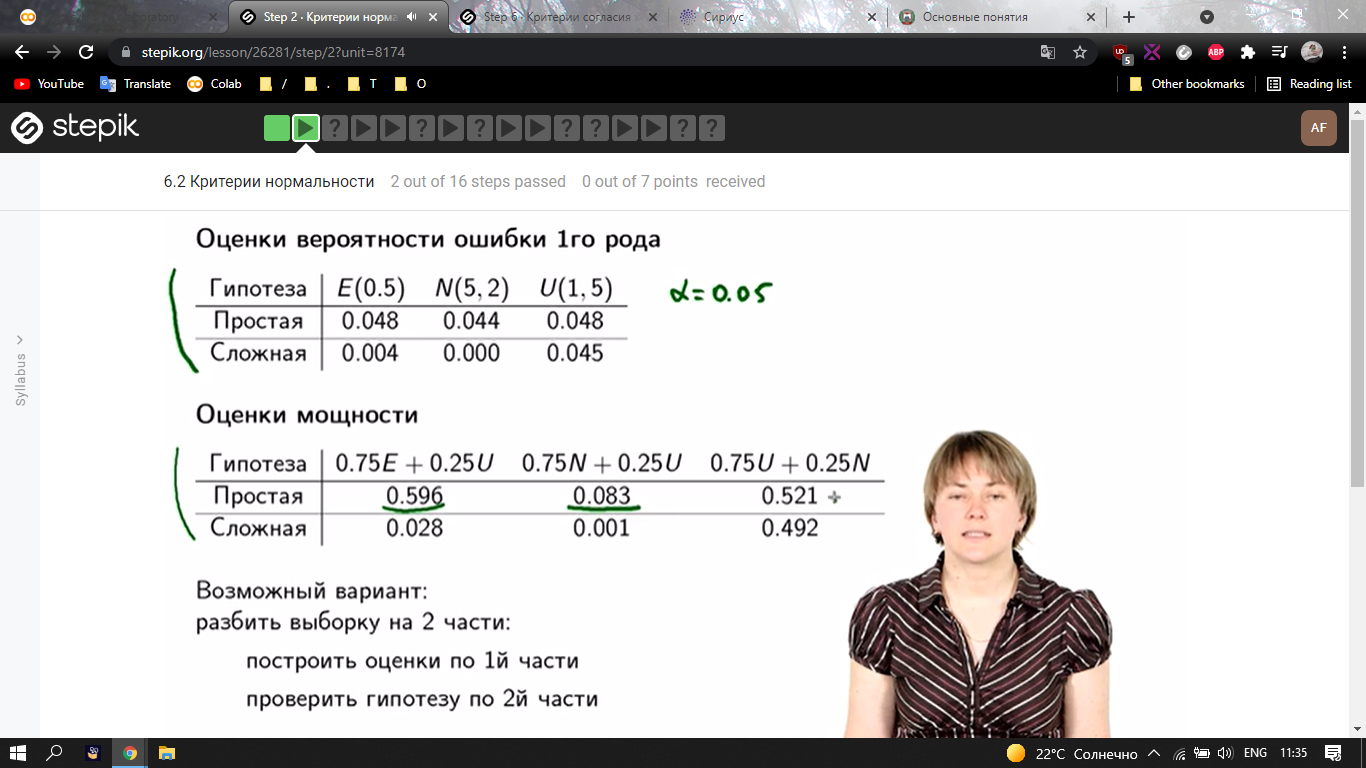

Вероятность вокликнуть "Н0!", когда на самом деле верна альтернатива - бетта, а мощность есть единица минус бетта.
Критерием Колмогорова не проверяем сложные. При n->oo мощность $ \gamma$ -> 1.
Критерий согласия Колмогорова используется для проверки простой нулевой гипотезы и только для непрерывных ген.совокупностей.

### **Критерии нормальности**

$ \xi, X_{[n]}$

$ H_0: \xi$~$ N(a, \sigma)$

$ H_1: \xi$ имеет иное распределение.

- критерий Жарка-Бера
- критерий Лиллиефорса
- критерий Андерсона-Дарлинга
- критерий Шапиро-Уилка

**Критерий Жарка-Бера**

(оценка коэффициентов экцесса и асимметрии:

$ JB = \frac{n}{6}(Sk^2+\frac{1}{4}K^2)$

$ Sk = \frac{\hat{\mu}_3}{\tilde{s}^3}, \tilde{s}^2=\frac{1}{n}\sum_i^n(x_i-\bar{x})^2, \hat{\mu}_3 = \frac{1}{n}\sum_i^n(x_i-\bar{x})^3, K =  \frac{\hat{\mu}_4}{\tilde{s}^4}-3, \hat{\mu}_4 = \frac{1}{n}\sum_i^n(x_i-\bar{x})^4$.

If $ H_0$ is true, then
$ JB->\zeta$~$ \chi^2(2)$

Else:
$ JB->+\infty$

If n is big:
$ V_k=(JB>\chi^2_{1-\alpha}(2))$

If n is small:
$ V_k=(JB>C_{1-\alpha})$, where $ C_{1-\alpha}$ is found using the Monte-Carlo method.

### Задание 1
По выборке

3.4 7.0 3.9 6.1 0.9 4.6 6.4 3.2 1.8 4.8 3.8 5.6 1.3 3.3 3.7 2.9 5.2 3.7 5.0 3.9

- найдите значение статистики Жарка-Бера

In [ ]:
sample = [3.4, 7.0, 3.9, 6.1, 0.9, 4.6, 6.4, 3.2, 1.8, 4.8, 3.8, 5.6, 1.3, 3.3, 3.7, 2.9, 5.2, 3.7, 5.0, 3.9]
n = len(sample)
sample_dict = get_dict(sample)
sample_mean = get_mean(sample_dict)
sample_Sk = get_skewness(sample_dict, sample_mean)
sample_K = get_kurtosis(sample_dict, sample_mean)
JB = n/6*(sample_Sk**2 + 1/4*sample_K**2)
print("JB=",JB)

JB= 0.21565419512883793


**Критерий Лиллиефорса**

(и для сложных гипотез в отличие от критерия Колмогорова)

$ D(X_{[n]} = sup_{x\in R}|F^*_n(x, X_{[n]})-Ф(x)|$

Поскольку МО и Д неизвестны - берём их выборочные приближения - выборочное среднее $\bar{x}$ и несмещенную оценку дисперсии $ s$.

Тогда теоретическая ф.р.:
$ Ф(x) = \frac{1}{\sqrt{2\pi}s}\int_{-\infty}^{x}e^{-\frac{(y-\bar{x})^2}{2s^2}}dy$

В случае истинности нулевой гипотезы статистика $ D$ будет стремиться к нулевому значению, иначе - к некоторому положительному числу.

$ V_k = (C_{1-\alpha}, +\infty)$, where $ C_{1-\alpha}$ is found using the critical values tables of Lilliefors' criteria or the Monte-Carlo method in suggestion that the sample is taken from a normal distribution.

**Критерий Андерсона-Дарлинга**
$ A^2 = -n - \sum_i^n\frac{2i-1}{n}[lnF(X_{(i)})+ln(1-F(X_{(n+1-i)}))]$, where $ X_{(i)}, X_{(n+1-i)}$ are order statistics.

$ F(x) = Ф(x)$

Если выборка взята не из норм. распределения, то с ростом n значение порядковой статистики будет возрастать.

Для нахождения выличины $ C_{1-\alpha}$ - воспользоваться таблицами, либо стат. пакетами.

Если статистика попадает в крит. область - то отвергаем нулевую гипотезу и считаем, что выборка взята не из норм. распр-я. В противном случае у нас нет оснований отклонять нулевую гипотезу.

Критерий Андерсона-Дарлинга используется не только для проверки нормальности ген.сов-ти. 
+ для проверки простой нулевой гипотезы с непрерывным законом распределения - в этом случае статистика $ A^2$ не зависит от проверяемого закона распределения. Если проверяем сложную гипотезу -  распределение статистики $ A^2$ зависит от предполагаемого семейства распределения.

!Проверять, что используем ф.р. и крит.значения соответсвующие ф.р.
!Если для нормальности - метод настроен для норм.

### Задание 2
По выборке

3.4 7.0 3.9 6.1 0.9 4.6 6.4 3.2 1.8 4.8 3.8 5.6 1.3 3.3 3.7 2.9 5.2 3.7 5.0 3.9

- найдите значение статистики Андерсона-Дарлинга

$ A^2 = -n - \sum_i^n\frac{2i-1}{n}[lnF(X_{(i)})+ln(1-F(X_{(n+1-i)}))]$, where $ X_{(i)}, X_{(n+1-i)}$ are order statistics.

In [ ]:
sample = [3.4, 7.0, 3.9, 6.1, 0.9, 4.6, 6.4, 3.2, 1.8, 4.8, 3.8, 5.6, 1.3, 3.3, 3.7, 2.9, 5.2, 3.7, 5.0, 3.9]
n = len(sample)
sample_dict = get_dict(sample)
sample_mean = get_mean(sample_dict)
sample_std = (get_disp(sample_dict, sample_mean)*n/(n-1))**0.5
sample_sorted = sorted(sample)
sample_sorted_rev = sorted(sample, reverse=True)
stats.norm.cdf(3,loc = sample_mean, scale=sample_std)
A_squared = - n - sum([(2*i-1)/n*(np.log(stats.norm.cdf(x_i,loc = sample_mean, scale=sample_std)) + np.log(1-stats.norm.cdf(x_n_i,loc = sample_mean, scale=sample_std))) for i, x_i, x_n_i in zip(range(1, n+1), sample_sorted, sample_sorted_rev)])
print("A^2=", A_squared)

A^2= 0.23459746106233226


**Критерий однородности Колмогорова-Смирнова**
- $ \xi, F(x), X_{[n]}$
- $ \eta, G(x), Y_{[m]}$
- $ F(x), G(x)$ - непрерывны.

- $ H_0: F(x)=G(x)=F_0(x)$ для всех $ x \ in R$
- $ H_1: F(x)\not=G(x)$ для всех $ x \ in R$

$ F^*_n$ - эмпирическая ф.р., построенная по выборке $ X_{[n]}$

$ G^*_m$ - эмпирическая ф.р., построенная по выборке $ Y_{[m]}$

$ F^*_n, G^*_m$ - приближения $ F_0(x)$

Если нулевая гипотеза выполняется, 

$ |F^*_n(x)-G^*_m(x)|_{n, m ->\infty}->0$

Иначе - модуль разности будет стремиться к некоторому положительному значению.

$ D_{m, n} = sup_{x\in R}|G^*_m(x, Y_{[m]})-F^*_m(x, X_{[n]})|$

Если $ F_0(x)=F(x)=G(x) $ непрерывны, тогда ф.р. случайной величины $\sqrt{\frac{mn}{m+n}}D_{m,n}$ при больших m, n сходится к ф.р. Колмогорова 

$ P_0(\sqrt{\frac{mn}{m+n}}D_{m,n}<z)->K(z)=\sum_{j=-\infty}^{+\infty}(-1)^je^{-2j^2z^2}$

Если нулевая гипотеза верна, ф.р. непрерывны - статистика $ \sqrt{\frac{mn}{m+n}}D_{m,n}$ имеет приближенное расп-е Колмогорова и можно строить приближенную критическую область $ V_k=(>d_{1-\alpha}), d_{1-\alpha}$-квантиль распределения Колмогорова.

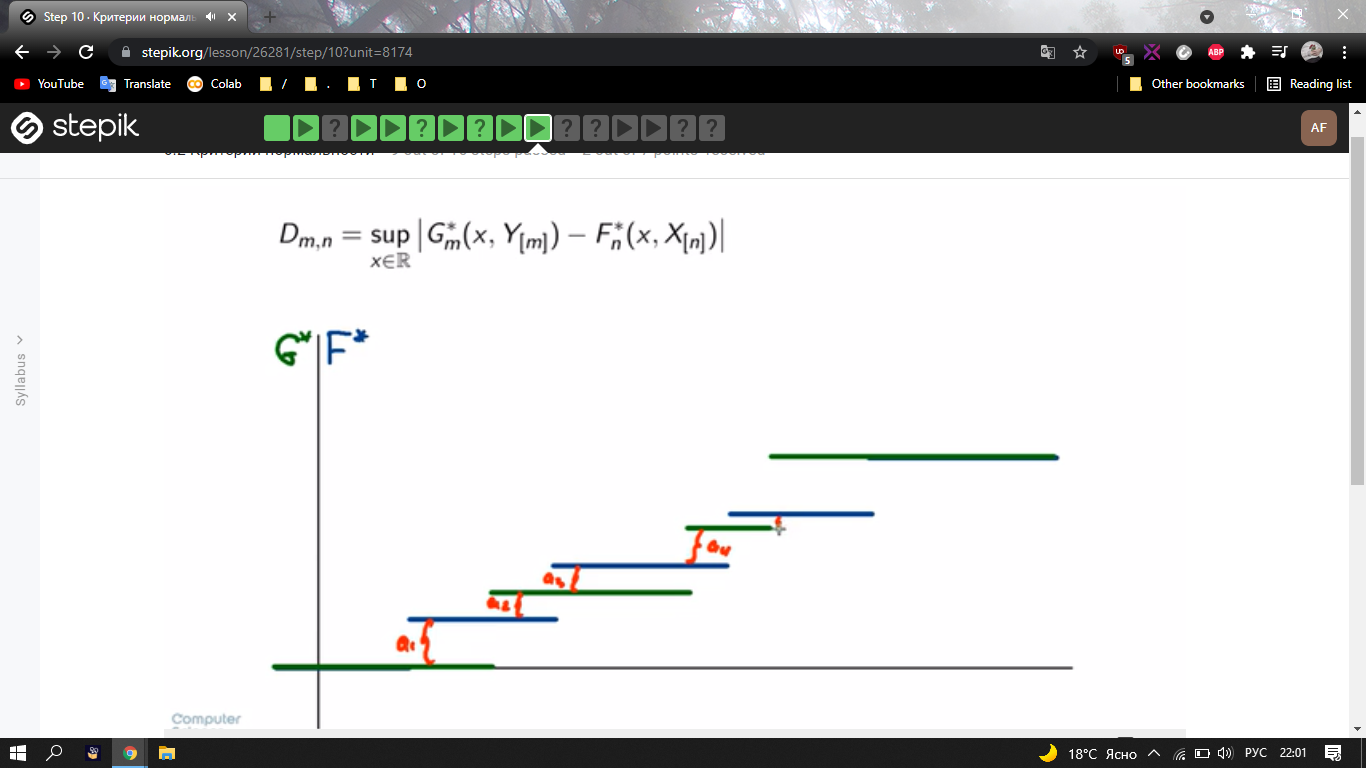

### Задача 3
Решим данную задачу с помощью критерия однородности Колмогорова-Смирнова

Кокаин чрезвычайно вреден для сердца, он может вызвать инфаркт миокарда даже у молодых людей без атеросклероза. Кокаин сужает коронарные сосуды, что приводит к уменьшению притока крови к миокарду кроме того, он ухудшает насосную функцию сердца. Нифедипин (препарат из группы антагонистов кальция) обладает способностью расширять сосуды, его применяют при ишемической болезни сердца. Ш. Хейл и соавт. (S. L. Hale, К. J. Alker, S. H. Rezkalla et al. Nifedipine protects the heart from the acute deleterious effects of cocaine if administered before but not after cocaine. Circulation, 83:1437—1443, 1991) предположили, что нифедипин можно использовать и при поражении сердца,
вызванном кокаином. Собакам вводили кокаин, а затем нифедипин либо физиологический раствор. Показателем насосной функции сердца служило среднее артериальное давление. Были получены следующие данные.
Среднее артериальное давление после приема кокаина, мм рт. ст.

Влияет ли нифедипин на среднее артериальное давление после приема кокаина?

- Найдите значение статистики критерия

In [ ]:
sample_placebo = [156, 171, 133, 102, 129, 150, 120, 110, 112, 130]
sample_nifedipine = [73, 81, 103, 88, 131, 106, 107, 111, 122, 108]
n1 = len(sample_placebo)
n2 = len(sample_nifedipine)
intervals_placebo_count_dict = {}
intervals_nifedipine_count_dict = {}
for e in range(72, 172, 10):
  name = str(e)+"-"+str(e+9)
  intervals_placebo_count_dict[name] = 0
  intervals_nifedipine_count_dict[name] = 0
for e1, e2 in zip(sample_placebo,sample_nifedipine):
  for c in range(72, 172, 10):
    name = str(c)+"-"+str(c+9)
    if c <= e1 and e1 <= c+9:
      intervals_placebo_count_dict[name] += 1
    if c <= e2 and e2 <= c+9:
      intervals_nifedipine_count_dict[name] += 1

print(intervals_placebo_count_dict, intervals_nifedipine_count_dict)

{'72-81': 0, '82-91': 0, '92-101': 0, '102-111': 2, '112-121': 2, '122-131': 2, '132-141': 1, '142-151': 1, '152-161': 1, '162-171': 1} {'72-81': 2, '82-91': 1, '92-101': 0, '102-111': 5, '112-121': 0, '122-131': 2, '132-141': 0, '142-151': 0, '152-161': 0, '162-171': 0}


In [ ]:
for k in intervals_placebo_count_dict.keys():
  intervals_placebo_count_dict[k]/=n1
for k in intervals_nifedipine_count_dict.keys():
  intervals_nifedipine_count_dict[k]/=n2
print(intervals_placebo_count_dict, intervals_nifedipine_count_dict)

{'72-81': 0.0, '82-91': 0.0, '92-101': 0.0, '102-111': 0.2, '112-121': 0.2, '122-131': 0.2, '132-141': 0.1, '142-151': 0.1, '152-161': 0.1, '162-171': 0.1} {'72-81': 0.2, '82-91': 0.1, '92-101': 0.0, '102-111': 0.5, '112-121': 0.0, '122-131': 0.2, '132-141': 0.0, '142-151': 0.0, '152-161': 0.0, '162-171': 0.0}


In [ ]:
F_placebo = []
G_nifedipine = []
f = g = 0
F_placebo.append(f)
G_nifedipine.append(g)
for k1, k2 in zip(intervals_placebo_count_dict.keys(),intervals_nifedipine_count_dict.keys()):
  f+=intervals_placebo_count_dict[k1]
  F_placebo.append(f)
  g+=intervals_nifedipine_count_dict[k2]
  G_nifedipine.append(g)
print(F_placebo, G_nifedipine)

[0, 0.0, 0.0, 0.0, 0.2, 0.4, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0] [0, 0.2, 0.30000000000000004, 0.30000000000000004, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0]


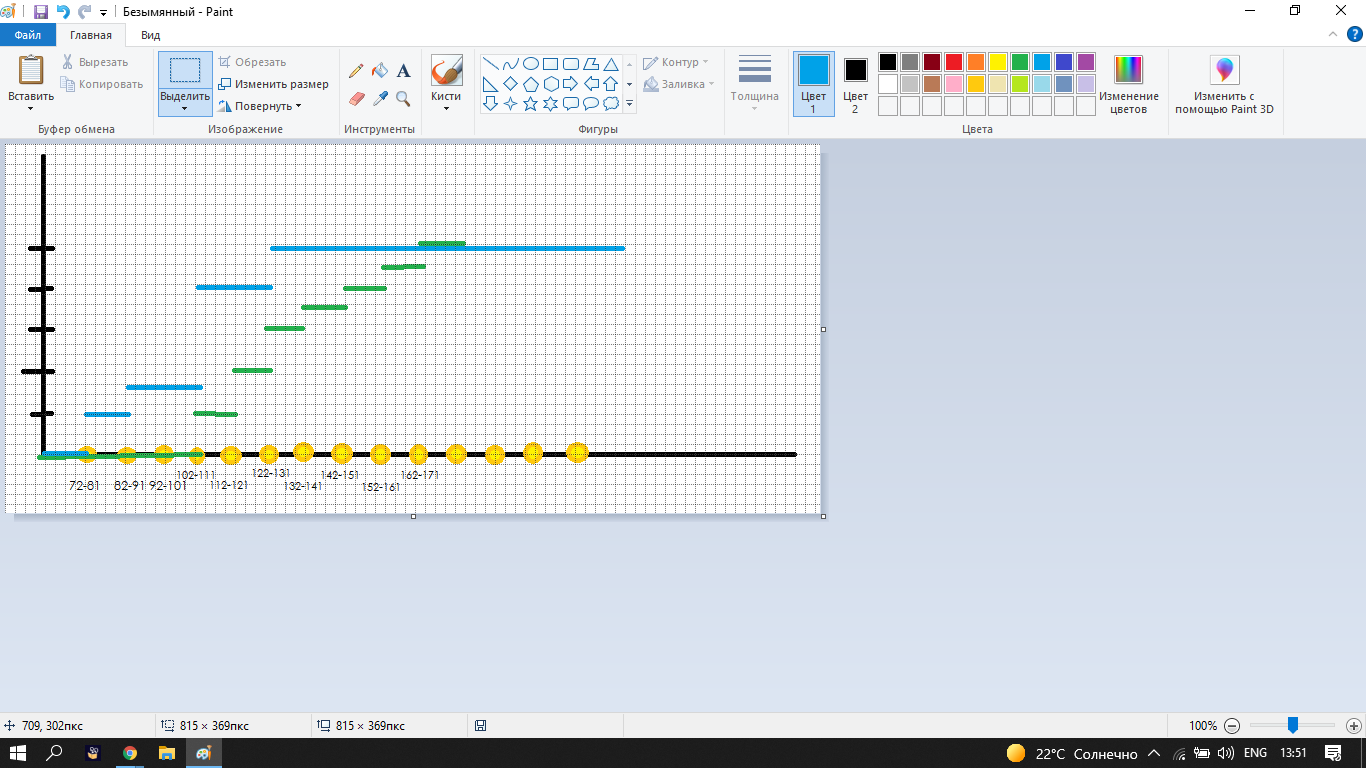

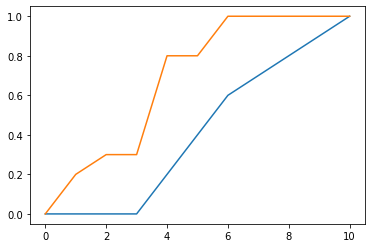

In [ ]:
x_intervals = [i for i in range(0, 11)]
plt.plot(x_intervals, F_placebo)
plt.plot(x_intervals, G_nifedipine)

In [ ]:
statistic = 5**0.5*0.6
print(statistic)

1.3416407864998738


Уровень значимости 0.02.

- Чему равен квантиль, участвующий в формировании критической области? Примите статистическое решение

Выбираем значение ф.р.Колмогорова близким к 1-0.02. Это 1.52. Статистика оказывается меньше данного значение. Следовательно, у нас нет оснований отклонять нулевую гипотезу.

### Задача 4
Кто выше баскетболисты или волейболисты?

Рост баскетболистов:
200,190,195,190,194,202,202,207,205,220,213,196,203

Рост волейболистов:
205,202,218,213,198,198,195,204,197,202,201,205,201,197,198,197,209


Проверьте гипотезу об однородности с помощью критерия хи-квадрат при уровне значимости 0.05.

Изначально разбейте множество значений обеих выборок на следующие интервалы:

[189,200], (200, 210], (210,221]

При необходимости объедините соседние интервалы (ожидаемые частоты во всех ячейках должны быть не меньше 5)

Чему равна статика критерия (в данном случае вычисляем без поправки Йетса)?

In [ ]:
sample_basketballers = [200,190,195,190,194,202,202,207,205,220,213,196,203]
sample_volleyballers = [205,202,218,213,198,198,195,204,197,202,201,205,201,197,198,197,209]
n1 = len(sample_basketballers)
n2 = len(sample_volleyballers)
alpha = 0.05
int_189_200_basketballers = sum([e<=200 for e in sorted(sample_basketballers)])
int_189_200_volleyballers = sum([e<=200 for e in sorted(sample_volleyballers)])

int_201_210_basketballers = sum([e>200 and e<=210 for e in sorted(sample_basketballers)])
int_201_210_volleyballers = sum([e>200 and e<=210 for e in sorted(sample_volleyballers)])

int_211_221_basketballers = sum([e>210 and e<=221 for e in sorted(sample_basketballers)])
int_211_221_volleyballers = sum([e>210 and e<=221 for e in sorted(sample_volleyballers)])

print(int_189_200_basketballers, int_189_200_volleyballers)
print(int_201_210_basketballers, int_201_210_volleyballers)
print(int_211_221_basketballers, int_211_221_volleyballers)
print(n1, n2)

6 7
5 8
2 2
13 17


Вычисляем вероятности попадения в интервалы:

In [ ]:
v1 = int_189_200_basketballers+int_189_200_volleyballers
prob_interval_1 = v1/(n1+n2)
prob_interval_2 = (int_201_210_basketballers+int_201_210_volleyballers)/(n1+n2)
prob_interval_3 = (int_211_221_basketballers+int_211_221_volleyballers)/(n1+n2)

Проверяем условие корректности разбиения на интервалы:

In [ ]:
check_interval_3_basketballers = n1*prob_interval_3 >= 5
check_interval_3_volleyballers = n2*prob_interval_3 >= 5
print(check_interval_3_basketballers, check_interval_3_volleyballers)

False False


In [ ]:
check_interval_2_basketballers = n1*prob_interval_2 >= 5
check_interval_2_volleyballers = n2*prob_interval_2 >= 5
print(check_interval_2_basketballers, check_interval_2_volleyballers)

True True


In [ ]:
check_interval_1_basketballers = n1*prob_interval_1 >= 5
check_interval_1_volleyballers = n2*prob_interval_1 >= 5
print(check_interval_1_basketballers, check_interval_1_volleyballers)

True True


Объедним 2й и 3й интервалы:

In [ ]:
int_201_221_basketballers = int_201_210_basketballers + int_211_221_basketballers
int_201_221_volleyballers = int_201_210_volleyballers + int_211_221_volleyballers

v2 = int_201_221_basketballers+int_201_221_volleyballers
prob_interval_2 = v2/(n1+n2)

check_interval_2_basketballers = n1*prob_interval_2 >= 5
check_interval_2_volleyballers = n2*prob_interval_2 >= 5
print(check_interval_2_basketballers, check_interval_2_volleyballers)

True True


$ \chi^2 $statistic is equal to $ n\sum_j^k\sum_i^r\frac{(n_{ij}-n_j\nu_i/n)^2}{n_j\nu_i}$, where $ k$ is number of groups(women/men, basketballers, volleyballers), $ r$ is the number of intervals.

In [ ]:
statistic = (n1+n2)*((int_189_200_basketballers - n1*prob_interval_1)**2/(n1*v1)+(int_201_221_basketballers - n1*prob_interval_2)**2/(n1*v2)+(int_189_200_volleyballers - n2*prob_interval_1)**2/(n2*v1)+(int_201_221_volleyballers - n2*prob_interval_2)**2/(n2*v2))
print(statistic)

0.07432280256342007


- 0.07432280256342007

- Чему равна статика критерия, если использовать поправку Йетса:

$ \chi^2=\sum\limits_{j=1}^{k}\sum\limits_{i=1}^{r} \frac{\left(\left|n_{ij}-\frac{\nu_in_j}{n}\right|-0.5\right)^2}{\frac{\nu_in_j}{n}}$?

In [ ]:
statistic = (n1+n2)*((abs(int_189_200_basketballers - n1*prob_interval_1)-0.5)**2/(n1*v1)+(abs(int_201_221_basketballers - n1*prob_interval_2)-0.5)**2/(n1*v2)+(abs(int_189_200_volleyballers - n2*prob_interval_1)-0.5)**2/(n2*v1)+(abs(int_201_221_volleyballers - n2*prob_interval_2)-0.5)**2/(n2*v2))
print(statistic)

0.009827808603427452


- 0.010

In [ ]:
stats.chi2.ppf(0.95, 1)

3.841458820694124

# 6.3 Таблицы сопряженности

$ O_1, O_2, ..., O_n$ - some observed objects(an object may be a person, a car, an answer of person).

Qualitive features:
Let any object has two feature:

$ A: A_1, ..., A_r$

$ B: B_1, ..., B_s$

        B1    B2   ...    Bs
    A1 n11   n12   ...    n1s   m1
    A2 n21   n22   ...    n2s   m2

    Ar nr1   n2r   ...    nrs   mr
       n1    n2    ...    ns    n

Рассмотрим критерии для сравнения и выявления взаимосвязи качественных характеристик(предпочтения людей, лекарство и выживаемость).

Как проверять?
Обозначим за $ p_i = P(A_i), i=1,...,r$ - вероятность, что признак А у случано взятого объекта принял значение $ A_i$
, $ q_j = P(B_j), j=1,...,s$ - вероятность, что признак B у случано взятого объекта принял значение $ B_j$

A и B **независимы**, если при любых i, j:
$ p_{ij}=P(A_i\cap B_j)=p_iq_j$

$ H_0: P(A_i\cap B_j)=p_iq_j$

$ \exists(i, j): P(A_i\cap B_j)\not=p_iq_j$

**Критерий хи-квадрат**

В предположении, что нулевая гипотеза верна, можем составить статистику критерия хи-квадрат: 
$ \chi^2 = \sum_i^r\sum_j^s\frac{(n_{ij}-np_iq_j)^2}{np_iq_j}$, где $ n_{ij}$-наблюдаемая частота, $ np_iq_j$-ожидаемая частота. 


Посчитать истинные значения $ p_i, q_j$ не можем, но можем найти оценки ММП. Составим функцию правдоподобия L:

$ L=\frac{n!}{\prod_{j,i}n_{ij}!}\prod_{j,i}(p_iq_j)^{n_{ij}}$, $ \sum_i^rp_i=1, \sum_j^sq_j=1$.

Точечные оценки:
$ \hat{p_i}=\frac{m_i}{n}$,
$ \hat{q_j}=\frac{n_j}{n}$

В случае истинности нулевой гипотезы при $ n->\infty:  \chi^2 = \sum_i^r\sum_j^s\frac{(n_{ij}-np_iq_j)^2}{np_iq_j}$~$ \chi^2((s-1)(r-1))$

Возпользовавшись данной асимптотикой, можем построить приближенный критерий и прибл. критическую область.
При неверности нулевой гипотезы статистика хи-квадрат имеет тенденцию к росту и область будет правосторонней:

$ V_k = (\chi^2(X_{[n]}))>\chi_{1-\alpha}^2((r-1)(s-1))$

В случае когда таблица сопряженности имеет размеры 2х2, статистика критерия нередко принимает завышенные значения и, следовательно, нулевая гипотеза отвергается чаще, чем предполагается, то есть не с вероятностью равному уровню $ \alpha$. В этом случае статистику считают, используя поправку Йейтса:
$ \chi^2 = \sum_i^r\sum_j^s\frac{(|n_{ij}-\frac{m_in_j}{n}| - 0.5)^2}{\frac{m_in_j}{n}}$~$ \chi^2(1)$.

### Задача 1
Утверждается, что результат действия лекарства зависит от способа его применения. Проверить это утверждение при α=0.05 по следующим данным:

Способ применения Благополучный результат  Неблагополучный результат

A            20             11

B            23             17

C            19             16



- Чему равен объем выборки?

In [ ]:
methods_num = 3
res_num = 2
prosperios_res = {'A': 20, 'B': 23, 'C': 19}
unprosperios_res = {'A': 11, 'B': 17, 'C': 16}
A_method = {'prosperios': 20, 'unprosperios': 11}
B_method = {'prosperios': 23, 'unprosperios': 17}
C_method = {'prosperios': 19, 'unprosperios': 16}

prosperios_count = sum(prosperios_res.values())
unprosperios_count = sum(unprosperios_res.values())
print('prosperios count: ', prosperios_count)
print('unprosperios count:', unprosperios_count)

A_method_count =  sum(A_method.values())
B_method_count =  sum(B_method.values())
C_method_count =  sum(C_method.values())

print('A-method: ', A_method_count)
print('B-method: ', B_method_count)
print('C-method: ', C_method_count)

if A_method_count+B_method_count+C_method_count == prosperios_count+unprosperios_count:
  N = prosperios_count+unprosperios_count
  print('Sum is:', N)
else:
  print("No corresponding")

prosperios count:  62
unprosperios count: 44
A-method:  31
B-method:  40
C-method:  35
Sum is: 106



$ \chi^2 = \sum_i^r\sum_j^s\frac{(n_{ij}-np_iq_j)^2}{np_iq_j}$~$ \chi^2((s-1)(r-1))$

$ \hat{p_i}=\frac{m_i}{n}$,
$ \hat{q_j}=\frac{n_j}{n}$

In [ ]:
prob_prosperios = prosperios_count/N
prob_unprosperios = unprosperios_count/N

prob_A = A_method_count/N
prob_B = B_method_count/N
prob_C = C_method_count/N

probs_methods = [prob_A, prob_B, prob_C]

statistic_part_prosperios = sum([(count-N*prob_prosperios*prob_method)**2/(N*prob_prosperios*prob_method) for count, prob_method in zip(list(prosperios_res.values()), probs_methods)])
statistic_part_unprosperios = sum([(count-N*prob_unprosperios*prob_method)**2/(N*prob_unprosperios*prob_method) for count, prob_method in zip(list(unprosperios_res.values()), probs_methods)])
statistic = statistic_part_prosperios+statistic_part_unprosperios
print(statistic)

0.734625896995824


- Найдите квантиль, участвующий в формировании критической области, и примите статистическое решение(статистическое решение: З,  результат действия лекарства зависит от способа его применения, Н в противном случае (З и Н - буквы русского алфавита))

In [ ]:
alpha = 0.05
q = stats.chi2.ppf(1-alpha, df=(methods_num-1)*(res_num-1))
print(q)

5.991464547107979


5.991, Н

In [ ]:
nij = np.array([[20, 11], [23, 17], [19, 16]]) # Таблица сопряженности

n = nij.sum()   # общее кол-во наблюдений в таблице сопряженности

mi = np.array([[sum(nij[i,:]) for i in range(nij.shape[0])]]).T
nj = np.array([[sum(nij[:, j]) for j in range(nij.shape[1])]])

minj = np.dot(mi, nj) # таблица (матрица) произведений mi*nj

xi2v = ((nij-minj/n)**2/(minj/n)).sum()
print(xi2v)

xi2_test = stats.chi2_contingency(nij)[0]
print(xi2_test)

(3, 2)
0.7346258969958243
0.7346258969958243


### Задача 2

Можно ли снизить риск тромбоза назначением небольших доз аспирина. Было проведено контролируемое испытание. Все больные, согласившиеся на участие в испытании и не имевшие противопоказании к аспирину, были случайным образом разделены на две группы: 1-я получала плацебо, 2-я — аспирин.

B 1-й группе тромбоз произошел у 3 из 4 больных, во 2-й — у 1 из 3. Можно ли говорить о статистически значимом 
различии доли больных с тромбозом, а тем самым об эффективности аспирина?

Воспользуйтесь **критерием Фишера** для проверки гипотезы. Уровень значимости 0.05

- Чему равна вероятность реализации исходной таблицы?

             Плацебо    Аспирин
    тробоз      3          1      4

    нет         1          2      3 

                4          3      7
                

In [ ]:
def factorial(n):
  if n==1 or n==0:
    return 1
  else:
    return n*factorial(n-1)

In [ ]:
statistic = factorial(4)*factorial(4)*factorial(3)*factorial(3)/(factorial(7)*factorial(3)*factorial(2))
print(statistic)

0.34285714285714286


In [ ]:
m1, m2 = 4, 3
n1, n2 = 4, 3
N = 7
n11 = 3
n12 = n1 - n11
n21 = m1 - n11
n22 = n2 - n21

In [ ]:
def get_prob_for_table(N, n1, n2, m1, m2, n11, n12, n21, n22):
  num = factorial(n1)*factorial(n2)*factorial(m1)*factorial(m2)
  denum = factorial(N)*factorial(n11)*factorial(n12)*factorial(n21)*factorial(n22)
  return num/denum

In [ ]:
get_prob_for_table(N, n1, n2, m1, m2, n11, n12, n21, n22)

0.34285714285714286

- Сколько еще можно создать таблиц с такими же значениями $ m_1, m_2, n_1, n_2$, как в исходной таблице? Исходную таблицу  не учитываем

- 3

- Найдите статистику критерия и примите статистическое решение(Р - доли различны, Н в потивном случае (буквы русские))(сумма вероятностей таблиц, которые меньше вероятности исходной)

In [ ]:
#tbl_1 = get_prob_for_table(N, n1, n2, m1, m2, n11, n12, n21, n22)
sum([get_prob_for_table(N, n1, n2, m1, m2, i, n1 - i, m1 - i, n2 - (m1 - i)) for i in range(1, n1+1) if get_prob_for_table(N, n1, n2, m1, m2, i, n1 - i, m1 - i, n2 - (m1 - i)) <= get_prob_for_table(N, n1, n2, m1, m2, 3, n1 - 3, m1 - 3, n2 - (m1 - 3))])

0.4857142857142857

- 0.49, Н(доли неразличны)

In [ ]:
stats.fisher_exact([[3, 1], [1, 2]])

(6.0, 0.4857142857142858)

### 6.4 Задание на проверку гипотезы о законе распределения

### Задача 1
В течение недели Василий был вынужден ездить на работу на автобусе. Каждый раз Василий замерял, сколько времени ему приходилось ждать автобуса (мин):

13.0 9.8 10.2 12.9 10.4

Правда ли, что время ожидания автобуса Василием подчиняется равномерному на [9, 15] закону распределения.

- Проверьте данную гипотезу с помощью критерия Колмогорова. Уровень значимости 0.01

Формат ответа: через запятую с пробелом

- значение статистики критерия
- квантиль, участвующий в формировании критической области
- статистическое решение (1, если время ожидания автобуса подчиняется равномерному на [9, 15] закону распределения, 0 - в противном случае)

Значения статистики и квантиля с точностью 2 знака после запятой

In [ ]:
sample_wait_time = [13.0, 9.8, 10.2, 12.9, 10.4]
sample_wait_time_sorted = sorted(sample_wait_time)
a, b = 9, 15
n = len(sample_wait_time)
F_uni_values = [(e-a)/(b-a) for e in sample_wait_time_sorted]
F_sample = [i/n for i in range(0, n)]
print(F_uni_values)
print(F_sample)

[0.13333333333333344, 0.19999999999999987, 0.2333333333333334, 0.65, 0.6666666666666666]
[0.0, 0.2, 0.4, 0.6, 0.8]


In [ ]:
def pair_diff(list1, list2):
  list2.append(1)
  diff_list = []
  for e in list1:
    index = list1.index(e)#считаем, что нет повторяющихся
    diff_list.append(abs(e-list2[index]))
    diff_list.append(abs(e-list2[index+1]))
  return max(diff_list)



In [ ]:
statistic = n**0.5*pair_diff(F_uni_values, F_sample)
statistic

0.8198915917499228

### Задача 2
Рейтинг хлопьев

По предложенной выборке  агрегированных рейтингов  хлопьев на завтрак, выдвиньте и проверьте гипотезу о законе распределения рейтингов.

Данные

- Представьте  графически исходные данные, а также данные, преобразованные с помощью натурального логарифма, и выдвините предположение о законе распределения, которому подчиняются агрегированные рейтинги хлопьев.

In [ ]:
cerial_dict = {}
header = True
with open('/content/tcereals.txt') as f:
  for line in f:
    if header == True:
      header = False
      continue
    line = line.rstrip().split('\t')
    cerial_dict[line[0]] = float(line[1])

cerial_dict

In [ ]:
list(cerial_dict.values())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


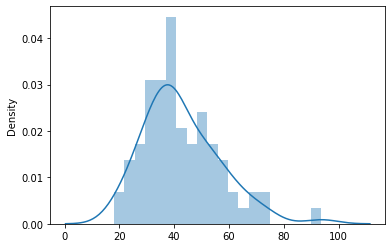

In [ ]:
distplot(a=sorted(list(cerial_dict.values())), bins=int(1+3.2*np.log(500)))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


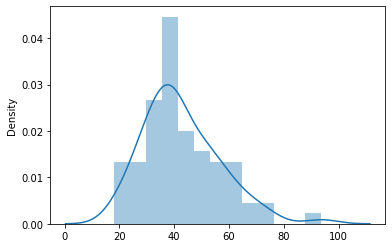

In [ ]:
distplot(a=sorted(list(cerial_dict.values())), bins=int(1.72*500**(1/3)))

In [ ]:
sample_from_pois = np.random.poisson(40, 1000)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


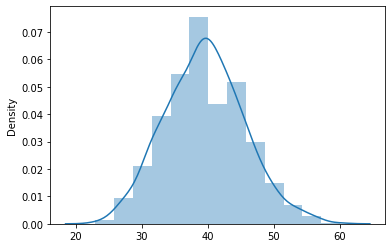

In [ ]:
distplot(a=sample_from_pois, bins=int(1.72*500**(1/3)))

In [ ]:
sample_from_lognorm = np.random.lognormal(40, 10, 100)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


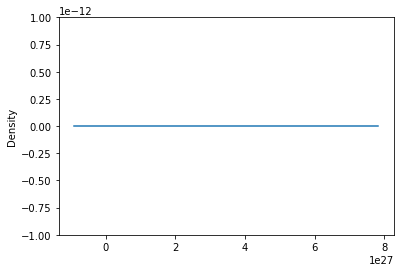

In [ ]:
distplot(a=sample_from_lognorm, bins=int(1.72*500**(1/3)))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


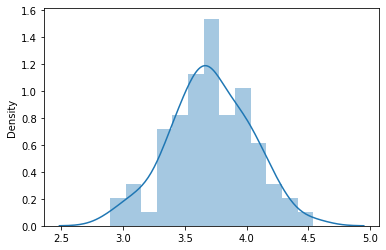

In [ ]:
distplot(a=[np.log(e) for e in list(cerial_dict.values())], bins=int(1.72*500**(1/3)))

- логнормальное распределение

- Преобразуйте данные с помощью натурального логарифма и проверьте нулевую гипотезу с помощью нескольких критериев

Формат ответа через запятую с пробелом
- p-значение согласно критерию Шапиро-Уилка
- статистическое решение согласно критерию Шапиро-Уилка (H0 - верна нулевая гипотеза, H1 - верна альтернативная гипотеза)
- p-значение согласно критерию Андерсона-Дарлинга
- статистическое решение согласно Андерсона-Дарлинга (H0 - верна нулевая гипотеза, H1 - верна альтернативная гипотеза)
- p-значение согласно критерию Лилифорса
- статистическое решение согласно критерию Лилифорса (H0 - верна нулевая гипотеза, H1 - верна альтернативная гипотеза)

**Anderson-Darling normality test**

data:  data
A = 0.89295, p-value = 0.02148


**Lilliefors (Kolmogorov-Smirnov) normality test**

data:  data
D = 0.13037, p-value = 0.002455


**Shapiro-Wilk normality test**

data:  data
W = 0.95347, p-value = 0.006746


In [ ]:
[np.log(e) for e in list(cerial_dict.values())]

	Shapiro-Wilk normality test

data:  data
W = 0.99429, p-value = 0.9829

    Anderson-Darling normality test

data:  data
A = 0.18253, p-value = 0.9087


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data
D = 0.067864, p-value = 0.5133

- 0.98, H0, 0.91, H0, 0.51, H0

### Задание 3 
У 150 мужчин и 150 женщин узнали, на что они обращают внимание при выборе автомобиля. Один из вопросов был: Важно ли при выборе автомобиля, сколько топлива потребляет автомобиль?

Результаты опроса следующие:

120 мужчин ответили, что очень важно,  28 - важно, 2 - не очень важно.

74 женщины ответили, что очень важно, 59 -  важно,  15 - не очень важно, 2 - не важно.

- Зависит ли критерий выбора автомобиля от пола? Уровень значимости 0.05

Для проверки гипотезы воспользуйтесь критерием хи-квадрат.

Формат ответа: через запятую с пробелом

- число степеней свободы функции распределения статистики критерия
- значение статистики критерия
- левая граница **области принятия** нулевой гипотезы
- правая граница **области принятия** нулевой гипотезы
- статистическое решение (1, если независимы, 0, если зависимы)

Значения статистики и границ области принятия гипотезы с точностью 2 знака после запятой (например, 1.00)



        Очень важно    Важно    Не очень важно   Не важно     Sum
    М     120           28         2                0       | 150
    Ж     74            59        15                2       | 150
    -------------------------------------------------------------
    Sum   194           87        17                2       | 300

In [ ]:
nij = np.array([[120, 28, 2], [74, 59, 17]])
n = nij.sum()
mi = np.array([[sum(nij[i,:]) for i in range(nij.shape[0])]]).T
nj = np.array([[sum(nij[:,j]) for j in range(nij.shape[1])]])

minj = np.dot(mi, nj)

xi2v = ((nij - minj/n)**2/(minj/n)).sum()
print(xi2v)
xi2_test = stats.chi2_contingency(nij)
print(xi2_test)

33.79529876949751
(33.79529876949751, 4.5861062807170865e-08, 2, array([[97. , 43.5,  9.5],
       [97. , 43.5,  9.5]]))


The quantile is

In [ ]:
alpha = 0.05
stats.chi2.ppf(1-alpha, df=2)

5.991464547107979

- The number of degrees of freedom is 2;
- The value of the statistic is 33.80
- The right value of confident field is 0
- The left value of confident field is 5.99
- So, our statistical decision is 0, because the value of the statistic 33.80 does not enter in confident field [0, 5.99], and a choose of a car depends from the sex with significance level 0.05.



The answer is
- 2, 33.80, 0, 5.99, 0

# 7.1 Множественная линейная регрессия

$\sum_i^n(y_i-\beta_0-\beta_1x_i)^2=Q->min_{\beta_0,\beta_1}$

$\frac{\partial Q}{\partial \beta_0}=-2\sum(y_i-\beta_0-\beta_1x_i)=0$

$\frac{\partial Q}{\partial \beta_1}=-2\sum(y_i-\beta_0-\beta_1x_i)x_i=0$

$n\hat{\beta_0}+\hat{\beta_1}\sum_i^nx_i=\sum y_i$

$\hat{\beta_0}\sum x_i + \hat{\beta_1}\sum x_i^2 = \sum y_ix_i$

So,

$ \hat{\beta_1}=\frac{\frac{1}{n}\sum y_ix_i - \bar{x} \bar{y}}{\frac{1}{n}\sum x_i^2 - \bar{x}^2}, \hat{\beta_0} = \bar{y}-\hat{\beta_1}\bar{x}$

$ \hat{y}(x)=\hat{\beta_0}+\hat{\beta_1}x$

Residuals:
$ e_i = y_i - \hat{y}(x_i)$

$RSS = \sum e_i^2$

$S^2 = \frac{RSS}{n-2}$

$ES^2=\sigma^2$

$Z_S=\frac{S^2(n-2)}{\sigma^2}$~$\chi^2(n-2)$

### Задача 1
Построим линейную регрессионную модель зависимости цены автомобиля Logan и года выпуска. 

Данные (цены в тыс.руб) 

Модель: $price=β_0+β_1year+ε$ (остальные переменные сейчас не используем)

- Найти с помощью метода наименьших квадратов оценку параметра $β_1$
​
  

In [ ]:
price = []
year = []
mileage = []
auto = []
header= True
with open('/content/car_regr.txt') as f:
  for line in f:
    if header==True:
      header=False
      continue
    line = line.rstrip().split('\t')
    price.append(int(line[0]))
    year.append(int(line[1]))
    mileage.append(float(line[2]))
    auto.append(line[3])

In [ ]:
year_mean = np.mean(year)
price_mean = np.mean(price)
year_disp = np.std(year)**2
n = len(price)
price_year_corr = np.dot(np.array(year).T, np.array(price))/n - year_mean*price_mean
beta_1 = price_year_corr/(year_disp)
print('beta_1=',beta_1)
print('year_disp=',year_disp)
print('price_year_corr=',price_year_corr)

beta_1= 26.043399375867097
year_disp= 7.117252066115701
price_year_corr= 185.35743801656645


In [ ]:
year_disp = sum([e**2 for e in year])/n - year_mean
corr = sum([e1*e2 for e1, e2 in zip(price, year)])/n-year_mean*price_mean
b1 = corr / year_disp
print('year_disp=',year_disp)
print('corr=', corr)
print('b1=',b1)

year_disp= 4037275.090909091
corr= 185.35743801656645
b1= 4.591152047923212e-05


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(y=df.price.values.reshape(-1,1), X=df.year.values.reshape(-1,1))
beta_1=model.coef_

In [ ]:
df = pd.DataFrame(data={'price': price, 'year': year})
print(df.head())

   price  year
0    250  2010
1    365  2013
2    365  2013
3    250  2009
4    310  2011


- Найти с помощью метода наименьших квадратов оценку параметра $\beta_0$
​
  

In [ ]:
beta_0 = price_mean - beta_1*year_mean
print(beta_0)

[[-52090.26932288]]


- Найдите остаток $e_1=y_1−\hat y_1$, соответствующий первому наблюдению

In [ ]:
e1 = price[0] - (beta_0+beta_1*year[0])
print(e1)

[[-6.9634226]]


- Найдите остаточную сумму квадратов RSS

In [ ]:
RSS = sum([(price[i] - (beta_0+beta_1*year[i]))**2 for i in range(n)])
print(RSS)

[[132015.31925394]]


- 132015.32

- Найдите S ( $S^2$ -- оценка дисперсии ошибок наблюдений)

$S^2 = \frac{RSS}{n-2}$

In [ ]:
S = (RSS/(n-2))**0.5
print(S)

[[56.06444405]]


- 56.06

- Найдите точность 95%го доверительного интервала для параметра $\beta_1$
​
  
а именно найдите $t_{1-\alpha/2}(n-2)S\sqrt{\frac{1}{nD^*_{year}}}$ 


In [ ]:
alpha = 0.05
stats.t.ppf(1-alpha/2, df = n-2)*S*(1/(n*year_disp))**0.5

array([[6.39357482]])

- 6.4

- Найдите прогноз цены  автомобиля 2012 года выпуска

In [ ]:
pred_price_for_2012 = beta_0 + beta_1*2012
print(pred_price_for_2012)

[[309.05022136]]


- 309


- Какова вероятность того, что цена  автомобиля Logan 2012 года выпуска будет меньше 290 тыс. руб?

$P(Y(40)>5000)=P(\frac{\hat{Y}(40)-Y(40)}{S\sqrt{\frac{1+(40-\bar{S})^2/D^*_S}{10}}}<\frac{\hat{Y}(40)-5000}{S\sqrt{\frac{1+(40-\bar{S})^2/D^*_S}{10}}})$, где $\bar{S}$ - выборочное среднее фактора, $D^*_S$-выборочное значение дисперсии фактора, S - оценка стандартного отклонения ошибок.

$\frac{\hat{Y}(40)-Y(40)}{S\sqrt{\frac{1+(40-\bar{S})^2/D^*_S}{10}}}$~$T(n-2)=T(8)$

$\frac{\hat{Y}(40)-5000}{S\sqrt{\frac{1+(40-\bar{S})^2/D^*_S}{10}}}=-1.93$

$ F_{T(8)}(-1.93)=0.04$

In [ ]:
stats.t.cdf(-1.93, df=8)

0.04486033184958726

In [ ]:
x = 2012
S_ = np.mean(year)
z = (pred_price_for_2012 - 290)/(S*((1+((x-S_)/np.std(year))**2)/n)**0.5)
prob = 1 - stats.t.cdf(z, df = n-2)
print(prob)

[[0.04481702]]


- Сколько фиктивных переменных необходимо ввести в некоторую регрессионную модель для переменной образование, которая может принимать следующие значения: начальное, среднее, неоконченное высшее, высшее?

- 3

#7.2 Анализ остатков


$Y, X=(X_1, X_2, ..., X_k)$

$y_i=\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+...+\beta_kx_{ik}, i = 1,...,n$

$E\varepsilon=0$
$K(\varepsilon_i\varepsilon_j)=0, i\not=j$

$ Y = A\beta+\varepsilon$ 
$Y = (Y_1, ..Y_n)^T, \beta=(\beta_1,...\beta_k)^T, \varepsilon=(\varepsilon_1, ..\varepsilon_n)^T,$

$A = ( 1 x_{11} x_{12} ... x_{1k})
 ( 1 x_{21} x_{22} ... x_{2k})$

 $(Y-A\beta)^T(Y-A\beta)=\sum(y_i-\beta_0-\beta_1x_{i1}-\beta_{k}x_{ik})^2->min_{\beta}$

 $(A^TA)\hat{\beta}=A^TY->\hat{\beta}=(A^TA)^{-1}A^TY$



## Задача 1
Построим линейную регрессионную модель зависимости цены автомобиля Logan, года выпуска, пробега (км) и типа коробки передач.

Данные (цены в тыс.руб)

Модель: $price = \beta_0+\beta_1 year +\beta_2 mileage+ \beta_3 z +\varepsilon$ 

z -- фиктивная переменная, принимающая значение 0, если коробка передач автоматическая, значение 1, если механическая

- Найдите  с помощью метода наименьших квадратов оценку параметра $\beta_1$
​
  

Формат ответа: значение оценки с точностью 2 знака после запятой

In [ ]:
header = True
year = []
mileage = []
z = []
price = []
with open('/content/car_regr.txt') as f:
  for line in f:
    if header == True:
      header = False
      continue
    line = line.rstrip().split('\t')
    price.append(float(line[0]))
    year.append(int(line[1]))
    mileage.append(float(line[2]))
    if line[3]=='AT':
      z.append(0)
    else:
      z.append(1)
    


In [ ]:
X_0 = np.ones(len(price))
A=(np.array([X_0, np.array(year), np.array(mileage), np.array(z)])).T
print(A.shape)

(44, 4)


In [ ]:
A[1][0]

1.0

In [ ]:
inv(A.T@A)

array([[ 2.81156812e+04, -1.39580438e+01, -5.84445599e-01,
        -1.35444283e+01],
       [-1.39580438e+01,  6.92953490e-03,  2.89833222e-04,
         6.63822285e-03],
       [-5.84445599e-01,  2.89833222e-04,  2.49636365e-05,
        -2.61119062e-04],
       [-1.35444283e+01,  6.63822285e-03, -2.61119062e-04,
         2.54604951e-01]])

In [ ]:
beta = inv(A.T@A)@A.T@np.array(price).T
beta[1]

20.48836148389807

- Найдите  с помощью метода наименьших квадратов оценку параметра $\beta_3$

In [ ]:
beta[3]

-103.58272343239297

In [ ]:
beta[2]

-0.13139714058484464

- Какие из нижеследующих утверждений следуют из построенной модели?

Обратите внимание на оценки параметров модели


- Автомобиль с механической коробкой передач дороже

- Чем больше пробег, тем машина дороже

- Чем старше машина, тем больше она стоит

- Чем больше пробег, тем машина дешевле

- Чем старше машина, тем меньше она стоит

- Автомобиль с автоматической коробкой передач дороже

**Свойства МНК-оценок**

1) Нулевые МО, не коррелированы и имееют равные дисперсии
$E\hat{\beta}=(A^TA)^{-1}A^TEY=(A^TA)^{-1}A^TA\beta=\beta$(несмещенные)

2) эти оценки наилучшие, то есть имеют наименьшую дисперсию среди всех оценок, которые являются линейными и несмещенными:
$D\tilde{\beta}_i≥D\hat{\beta}_i, i= 1, ...,k$

3) $D\hat{\beta}=E((\hat{\beta}-\beta)(\hat{\beta}-\beta)^T)=\sigma^2(A^TA)^{-1}$

**Распределение оценок**

Пусть $\varepsilon^T=(\varepsilon_1, .., \varepsilon_n) $~$N(0, \sigma^2E_n)$(ошибки независимы)

В этом случае величина

$\frac{(n-k-1)S^2}{\sigma^2}$~$\chi^2(n-k-1)$ - взаимно независима с вектором оценок $\hat{\beta}$

$\hat{\beta}$~$N(\beta, \sigma^2(A^TA)^{-1})$

$\frac{\hat{\beta_j}-\beta_j}{S\sqrt{[(A^TA)^{-1}]_{(j+1)(j+1)}}}$~$T_{n-k-1}, j = 0,...,k$

$\frac{\hat{y}(x)-y(x)}{S\sqrt{x^t(A^TA)^{-1}x}}$~$T_{n-k-1}, x=(1, x_1, ..., x_k)$

**Доверительные интервалы**

$ \beta_j, j=1,...,k$

$\hat{\beta_j}±t_{1-\frac{\alpha}{2}}(n-k-1)S\sqrt{[(A^TA)^{-1}]_{(j+1)(j+1)}}$

$y(x)=\beta_0+\beta_1x_1+\beta_2x_2+...+\beta_kx_k$

$\hat{y}(x)±t_{1-\frac{\alpha}{2}}(n-k-1)S\sqrt{{x^T(A^TA)^{-1}x}}$

$\sigma^2$

$(\frac{S^2(n-k-1)}{\chi^2_{1-\alpha/2}(n-k-1)}, \frac{S^2(n-k-1)}{\chi^2_{\alpha/2}(n-k-1)})$


- Найдите диагональный элемент матрицы $(A^TA)^{-1}$, участвующий в построении доверительного интервала для параметра $\beta_1$​
  

In [ ]:
diag_elem_beta_1=inv(A.T@A)[1][1]
diag_elem_beta_1

0.0069295349027427506

In [ ]:
diag_elem_beta_2=inv(A.T@A)[2][2]
diag_elem_beta_2

2.496363646459788e-05

- Найдите точность 95% доверительного интервала для $\beta_2$
  

Предполагаем, что ошибки наблюдений удовлетворяют  необходимым предположениям

$\hat{\beta_j}±t_{1-\frac{\alpha}{2}}(n-k-1)S\sqrt{[(A^TA)^{-1}]_{(j+1)(j+1)}}$

In [ ]:
alpha = 0.5
n = len(price)
k = 4
RSS=sum([(price[i]-np.dot(A[i], beta.T))**2 for i in range(len(price))])
S = (RSS/(n-k-1))**0.5
q =stats.t.ppf(1-alpha/2, df=n-k-1)
diag_elem_beta_2=inv(A.T@A)[3][3]
accuracy = q*S*diag_elem_beta_2**0.5
print(accuracy)

16.280302687411798


In [ ]:
inv(A.T@A)

array([[ 2.81156812e+04, -1.39580438e+01, -5.84445599e-01,
        -1.35444283e+01],
       [-1.39580438e+01,  6.92953490e-03,  2.89833222e-04,
         6.63822285e-03],
       [-5.84445599e-01,  2.89833222e-04,  2.49636365e-05,
        -2.61119062e-04],
       [-1.35444283e+01,  6.63822285e-03, -2.61119062e-04,
         2.54604951e-01]])

**Коэффициент детерминации** 

$R^2=\frac{(\sum(y_i-\bar{y})(\bar{y}_i-\bar{y}))^2}{\sum(y_i-\bar{y})^2(\sum\hat{y_i}-\bar{y})^2}=1-\frac{RSS}{\sum(y_i-\bar{y})^2}$

**Значимость модели**

Пусть $\varepsilon^T=(\varepsilon_1, \varepsilon_2, \varepsilon_n)$~$N(0,\sigma^2 E_n)$


$H_0: \beta_1=..=\beta_k=0$

$H_1: \exists\beta_r\not=0$

$F=\frac{R^2}{1-R^2}\frac{n-k-1}{k}$~$F_{k, n-k-1}$

$V_k=(F>F_{1-\alpha}(k, n-k-1))$


$H_0: \beta_{k_1}=..=\beta_{k_q}=0, k_i\not=0$

$H_1: \exists\beta_{k_i}\not=0$

$F=\frac{(RSS_{H_0}-RSS)/q}{RSS/(n-k-1)}$~$F(q,n-k-1)$

$V_k=(F>F_{1-\alpha}(q,n-k-1))$

$H_0:\beta_j=0$

$H_1:\beta_j\not=0$

$t_{\beta_j}=\frac{\hat{\beta_j}}{S\sqrt{[(A^TA)^{-1}]_{(j+1)(j+1)}}}$~$T(n-k-1)$

$V_k=(|t_{\beta_j}|>t_{1-\alpha/2}(n-k-1)$


Отбирая факторы и проверяя значимость модели, можем получить несколько моделей, которые являются значимыми и содержат разное число факторов, при этом они имееют близкие значения остаточной суммы квадратов(RSS). Какую из моделей следует выбрать?

Ответить на данный вопрос помогут **Информационные критерии Акаике и Шварца**

Статистика критерия Акаике:

$AIC = 2k+n[ln\frac{RSS}{n}+1]$

Статистика критерия Шварца(статистика БайЕсовского критерия):

$BIC = kln[n]+n[ln\frac{RSS}{n}+1]$


Из двух моделей предпочтительно выбрать модель с меньшим значением статистики критерия Акаике или статистики критерия Шварца.

- Найдите коэффициент детерминации и проверьте значимость модели. Уровень значимости 0.05

Формат ответа: через запятую с пробелом

коэффициент детерминации с точностью 2 знака после запятой
1 если модель значима, 0 в противном случае
Предполагаем, что ошибки наблюдений удовлетворяют  необходимым предположениям

In [ ]:
price_mean = np.mean(price)

R_squared = 1 - RSS/sum([(price[i]-price_mean)**2 for i in range(len(price))])
R_squared

0.7456943477859428

$V_k=(F>F_{1-\alpha}(k, n-k-1))$

In [ ]:
q = stats.f.ppf(1-alpha,k,n-k-1)
q

0.853939205499401

- 0.75, 1
Модель значима, поскольку значение статистики не попадает в критическую область

Рассмотрим методы, используемые для анализа остатков множественной линейной регрессии $y=\beta^Tx+\varepsilon$

$\hat{y}(x)=\hat{\beta}_0(x)+\hat{\beta}_1x_1+...+\hat{\beta}_kx_k$

$e_i=y_i-\hat{y_i}$ - остаток.

$D(e_i)=\sigma^2(1-h_{ii}), i = 1,...n, h_{ii}=[A(A^TA)^{-1}A^T]_{ii}$

$\frac{e_i}{\sqrt{D(e_i)}}=\frac{e_i}{\sigma\sqrt{1-h_{ii}}}, i=1,..n.$

Стандартизованные остатки:

$d_i=\frac{e_i}{S\sqrt{1-h_{ii}}}, i=1,..n,S^2=\frac{RSS}{n-k-1}$

- получили новые остатки $d_i$, которые называются тсандартизованными остатками. При графическом анализе остатков используются стандартизованные остатки.

Для проверки гипотез исп-ся как исходные, так и стандартизованные остатки.

В случае $k<<n$ значения величин $h_{ii}$ малы и $d_i$~$\frac{e_i}{S}$

- Найдите значение стандартизованного остатка, соответствующего  2му наблюдению

In [ ]:
e_2 = price[1] - np.dot(A[1],beta.T)
n = len(price)
k = 3
S = (RSS/(n-k-1))**0.5
m = A@inv(A.T@A)@A.T
h_22 = m[1][1]
d_2 = e_2/(S*(1-h_22)**0.5)
d_2

1.2373635093640978

График зависимости остатков $d_i$ от оцененных значений $\hat{y}_i=A\hat{\beta}$ позволяет выявить:
- наличие выбросов
- неоднородность дисперсии, гетероскедастичность
- неправильную спецификацию модели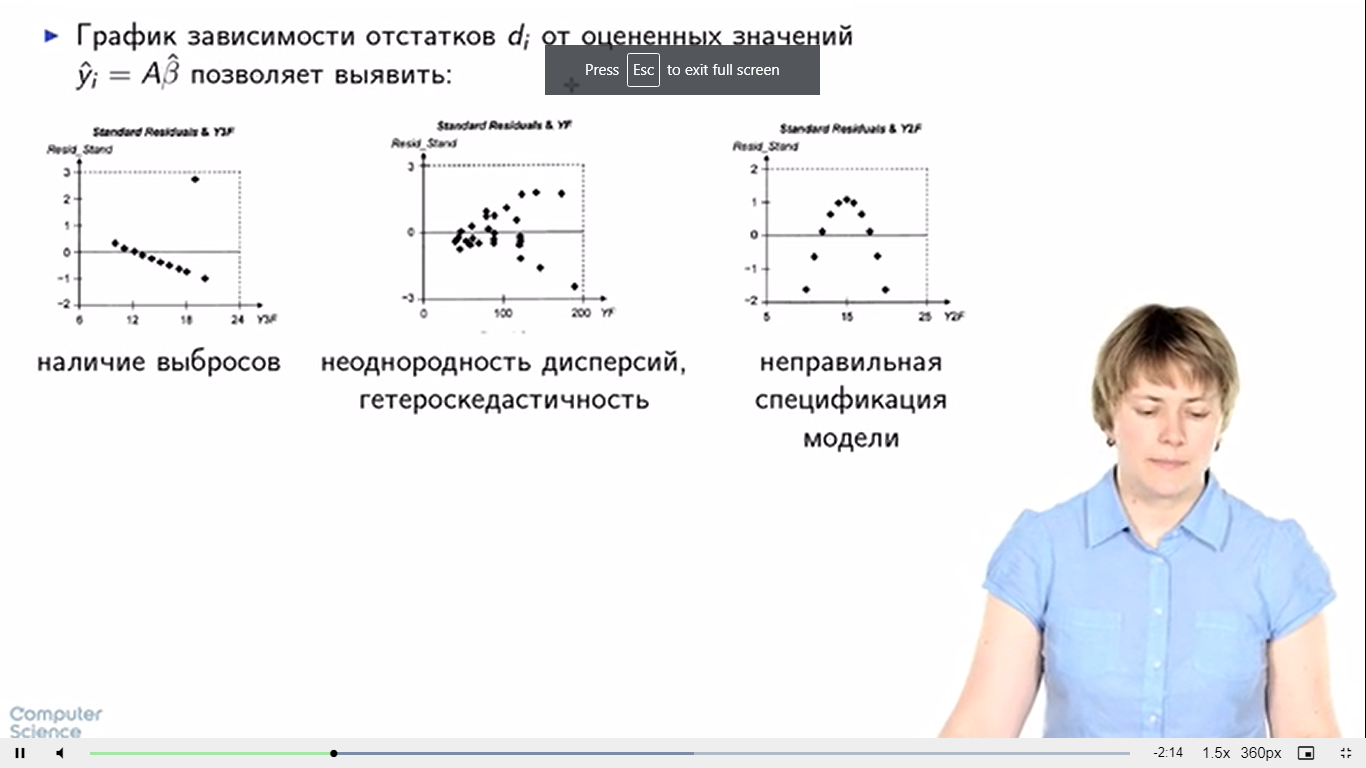

- График зависимости $d_i$ от значений объясняющих переменных $x_{ij}$
- График зависимости остатков от номера наблюдения(если важен порядок наблюдения во времени)
- графические методы проверки предположения о нормальности распределения случайнх составляющих(диаграмма "квантиль-квантиль")

### Задача 2
По наблюдениям была построена выборочная линейная регрессия $\hat y = 4.66+ 1.03 x $
- Какие из основных предположений  об ошибках наблюдений нарушены?
Воспользуйтесь графическим анализом, чтобы ответить на поставленный вопрос

In [ ]:
X = [i/10 for i in range(10, 101,5)]
y = [4.7, 8.9, 6.2, 7.8, 8.1, 11.7, 7.2, 15.8, 1.1, 6.8, 9.1, 4.6, 21.5, 7.6, 6.2, 13.6, 30.1, 25.5, -0.1]

$d_i=\frac{e_i}{S\sqrt{1-h_{ii}}}, i=1,..n,S^2=\frac{RSS}{n-k-1}$

$h_{ii}=[A(A^TA)^{-1}A^T]_{ii}$

In [ ]:
n = len(Y)
k = 1
beta_0 = 4.66
beta_1 = 1.03
y_hat = [beta_0+beta_1*X[i] for i in range(n)]
e_i = [y[i]-y_hat[i] for i in range(n)]
RSS = sum([(i)**2 for i in e_i])
S = (RSS/(n-k-1))**0.5
X_0 = np.ones(n)
A = np.array([X_0, X]).T
m = A@inv(A.T@A)@A.T
h_ii = [m[i][i] for i in range(n)]
d_i = [e_i[i]/(S*(1-h_ii[i])**0.5)for i in range(n)]
print(d_i)

[-0.145784128054131, 0.3897056344598611, -0.07403617774224122, 0.07939891566743182, 0.04865705524740535, 0.47341551825126826, -0.21631728239173653, 0.8864337803600388, -1.1836005661558016, -0.47856797529430883, -0.2364483335374391, -0.9205011816036991, 1.3184401452103933, -0.659474018874038, -0.9314350575931891, 0.025997875041548314, 2.3022403732539223, 1.5985884189067772, -2.217685826762841]


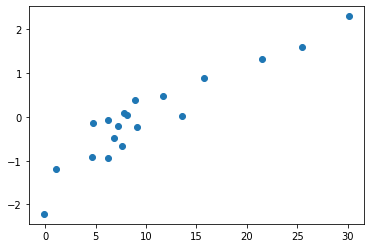

In [ ]:
#y_hat = [beta_0+beta_1*X[i]for i in range(n)]
plt.scatter(Y, d_i)
#plt.scatter(X, Y)
#plt.plot()

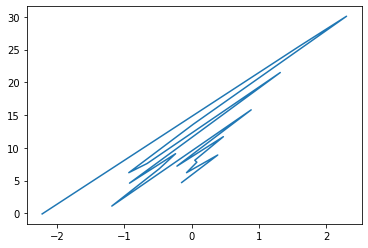

In [ ]:
plt.plot(d_i, y)

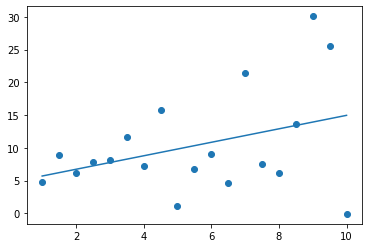

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_hat)


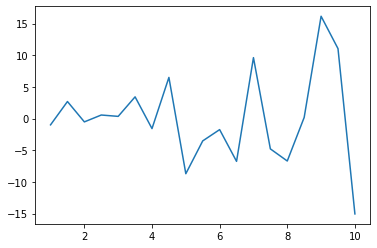

In [ ]:
plt.plot(X, e_i)

Оценивание остатков на нормальность:

In [ ]:
stats.shapiro(e_i)

(0.9758793711662292, 0.8846269249916077)

In [ ]:
for i in range(len(y)):
  print(y[i], y_hat[i])

4.7 5.69
8.9 6.205
6.2 6.720000000000001
7.8 7.235
8.1 7.75
11.7 8.265
7.2 8.780000000000001
15.8 9.295
1.1 9.81
6.8 10.325
9.1 10.84
4.6 11.355
21.5 11.870000000000001
7.6 12.385000000000002
6.2 12.9
13.6 13.415000000000001
30.1 13.93
25.5 14.445
-0.1 14.96


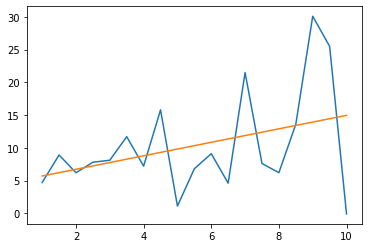

In [ ]:
plt.plot(X, y)
plt.plot(X, y_hat)

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(X, line='45',fit=True)

AttributeError: ignored


- Зависимость дисперсии ошибок наблюдений от номера наблюдения

- Остатки ненормальны

- Зависимость дисперсии ошибок наблюдений от X

- Наличие выборосов в данных

- Неправильная спецификация модели

- Зависимость дисперсии ошибок наблюдений от Y

# 7.3 Корреляционный анализ


## Задание 1
По выборке из двумерного нормального распределения 

(3.25, 0.62)   (2.51,0.95)  (1.46,0.37)  (2.37,1.64) ( 2.45, 0.60) (-0.07,0.19) ( 3.78,1.81) (0.53,0.24) ( 2.09,1.26)  (1.74,-0.93)

- найдите выборочный коэффициент корреляции Пирсона

In [ ]:
X = [3.25, 2.51, 1.46, 2.37, 2.45, -0.07, 3.78, 0.53, 2.09, 1.74]
Y = [0.62, 0.95, 0.37, 1.64, 0.60, 0.19, 1.81, 0.24, 1.26, -0.93]
X_mean = get_mean(get_dict(X))
Y_mean = get_mean(get_dict(Y))
X_disp = get_disp(get_dict(X), X_mean)
Y_disp = get_disp(get_dict(Y), Y_mean)
r = (get_mean(get_dict([x*y for x, y in zip(X, Y)])) - X_mean*Y_mean)/(X_disp*Y_disp)**0.5
r

0.5621846665498426

## Задание 2
По выборке из двумерного нормального распределения

(3.25, 0.62)   (2.51,0.95)  (1.46,0.37)  (2.37,1.64) ( 2.45, 0.60) (-0.07,0.19) ( 3.78,1.81) (0.53,0.24) ( 2.09,1.26)  (1.74,-0.93)

Зависимы ли компоненты случайного вектора? Проверьте гипотезу с помощью точного критерия. Уровень значимости 0.05

- Найдите значение статистики критерия и примите статистическое решение.

In [ ]:
n = len(X)
Z = r*(n-2)**0.5/(1-r**2)**0.5
Z

1.9227035159310681

In [ ]:
alpha = 0.05
q_left = stats.t.ppf(alpha/2, df=n-2)
q_right = stats.t.ppf(1-alpha/2, df=n-2)
print(q_left, q_right)

-2.306004135033371 2.3060041350333704


- 1.92, 0

Урожай пшеницы, урожай кукурузы - зависимость через третий признак - удобрения, погода

### Порядковые шкалы
Шкалы, в которых существенен лишь порядок взаимный, в котором следуют результаты измерений, а не их колоичественные значений, называют порядковыми или ординальными шкалами.

$O_1, O_2, ..., O_n$

$A, B: (X_i, Y_i), 1<=i<=n$

- Коэффициент ранговой корреляции Спирмена
- Коэффициент ранговой корреляции Кенделла

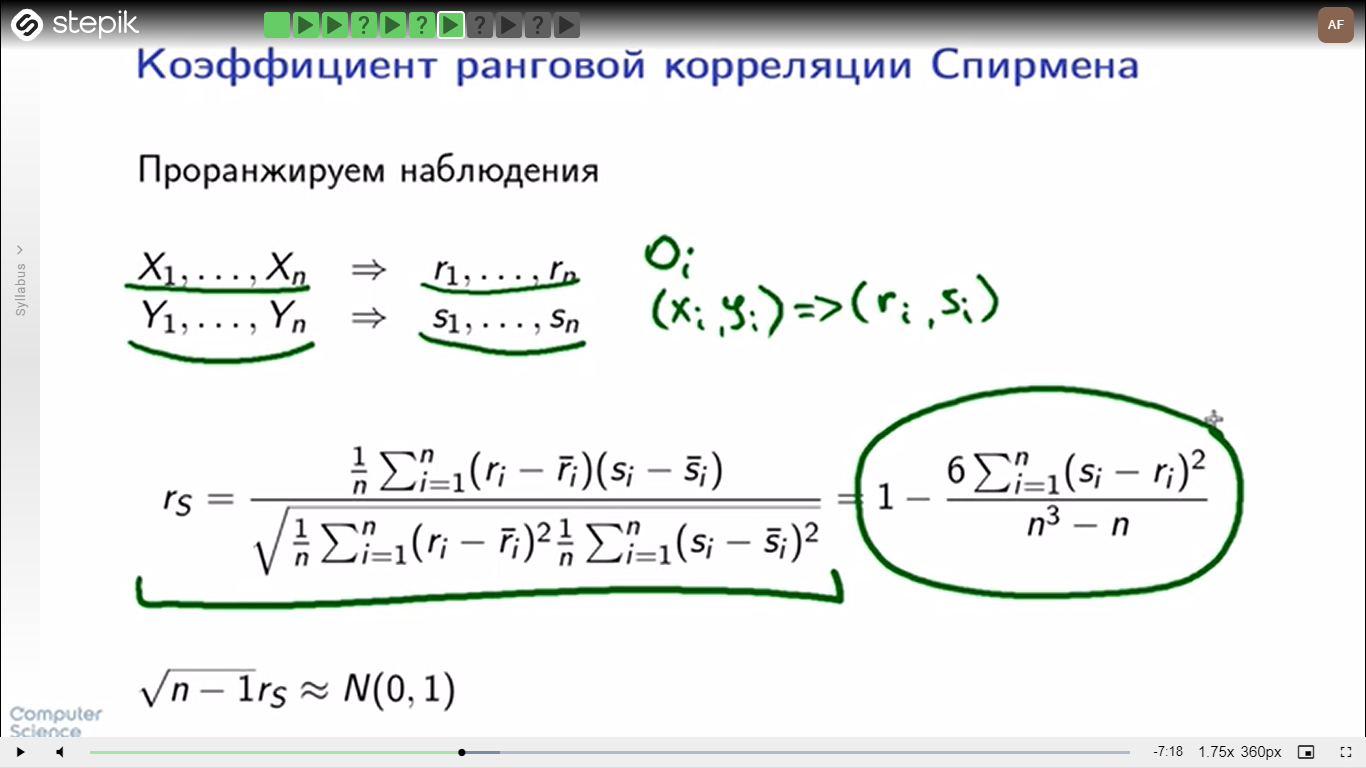

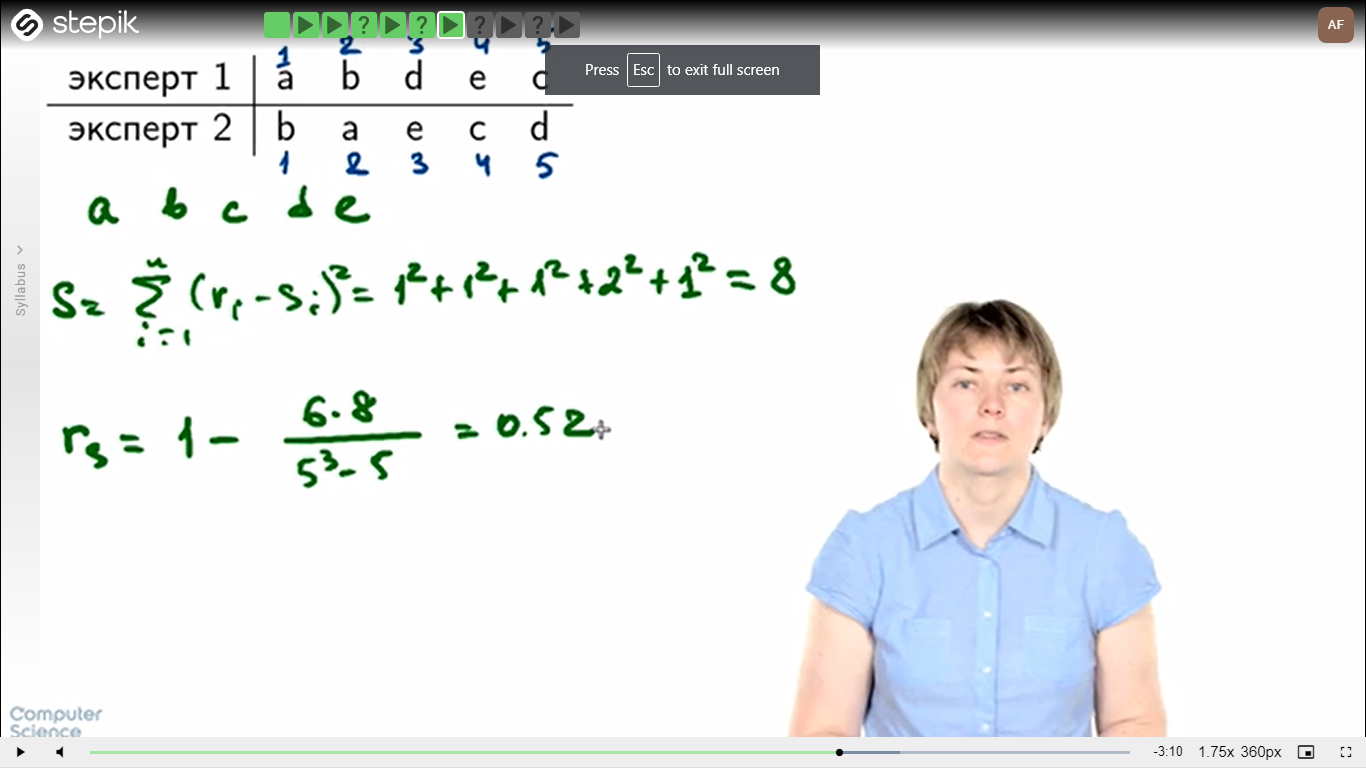

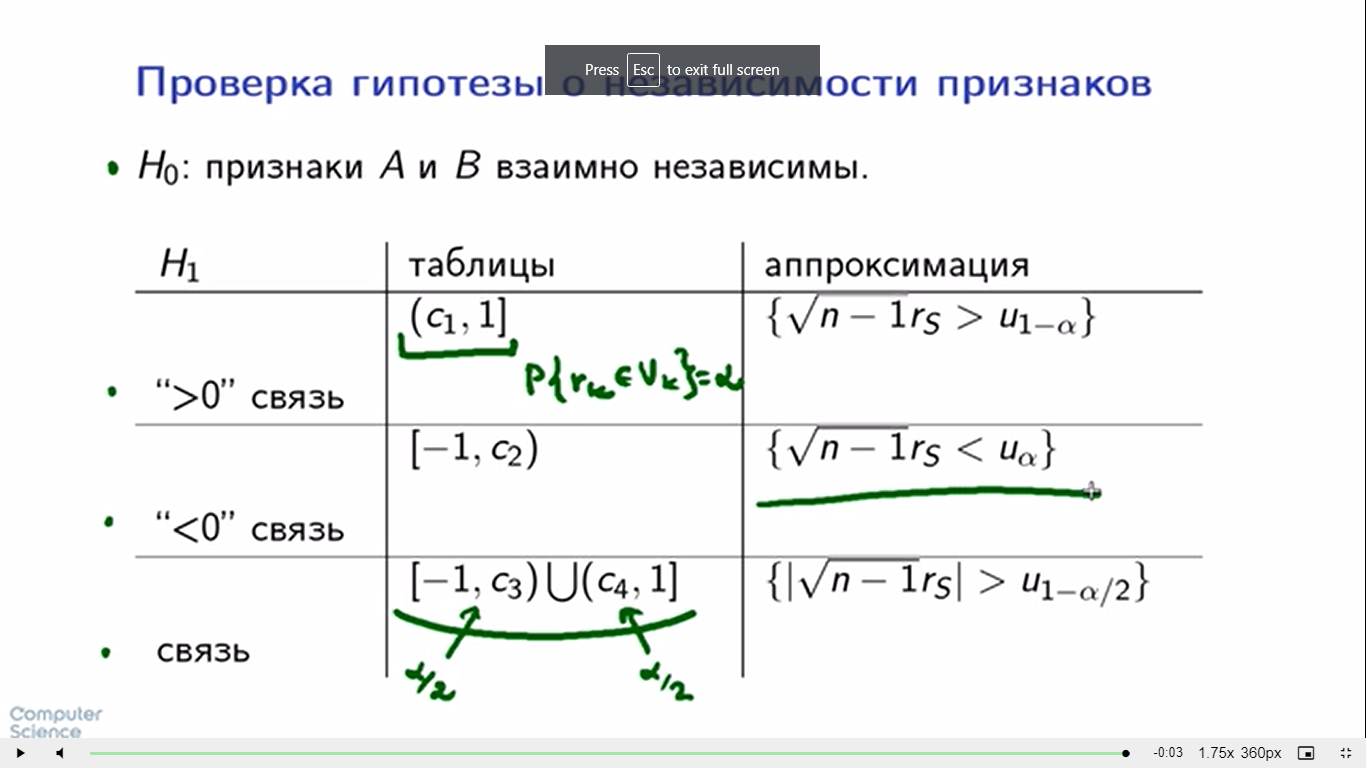

### Задание 3
С помощью двух алгоритмов ранжирования были отранжированы 10 документов:

d1,d2,d3,d4,d5,d6,d7,d8,d9,d10

Ранжировки:

1) d6 d2 d10 d8 d3 d9 d1 d5 d4 d7

2) d10 d6 d8 d2 d3 d9 d1 d5 d7 d4


- Насколько сильно отличаются ранжировки данных алгоритмов?

Чтобы ответить на вопрос, найдите коэффициент ранговой корреляции Спирмена

In [ ]:
S = 0 + 2**2 + 0 + 1**2 + 0 + 1**2 + 1**2 + 1**2 + 0 + 2**2
S

12

In [ ]:
n = 10
r = 1 - (6*S)/(n**3-n)
r

0.9272727272727272

- зависимы

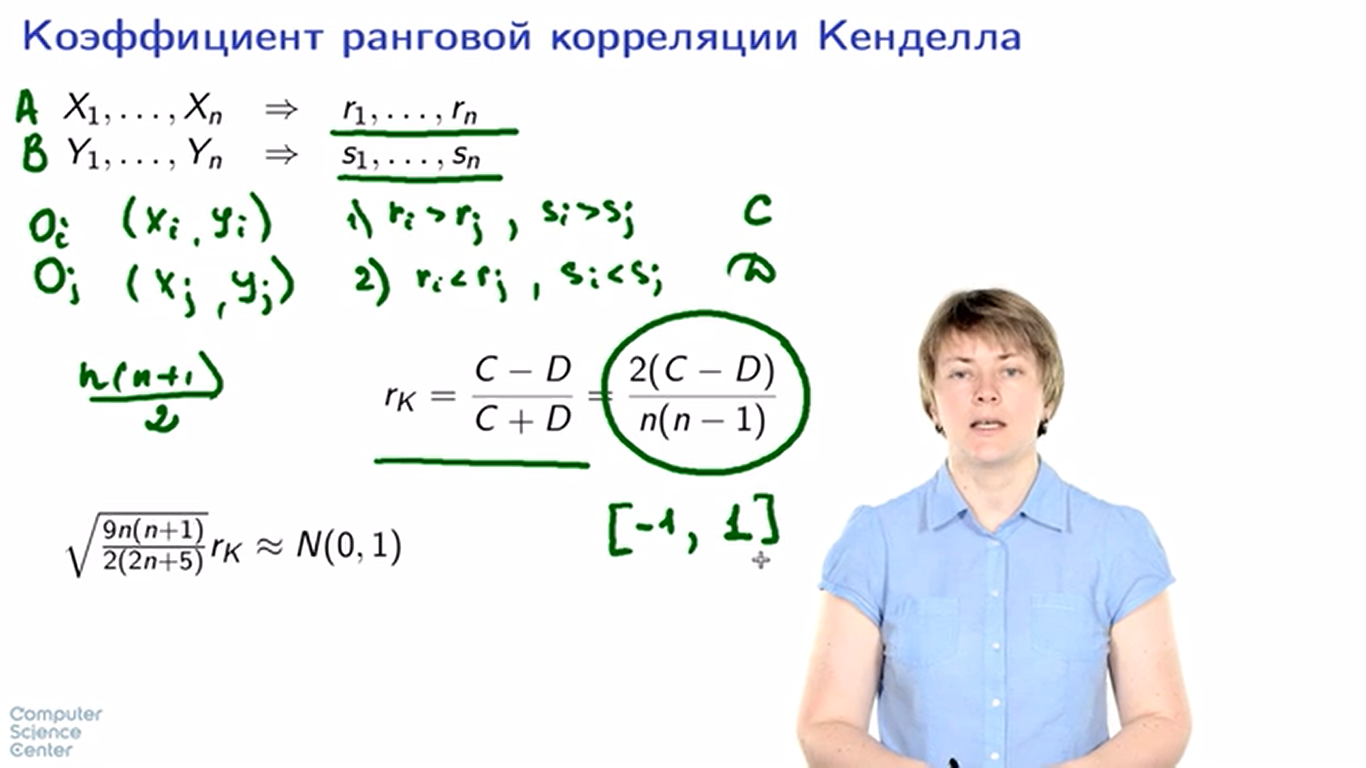

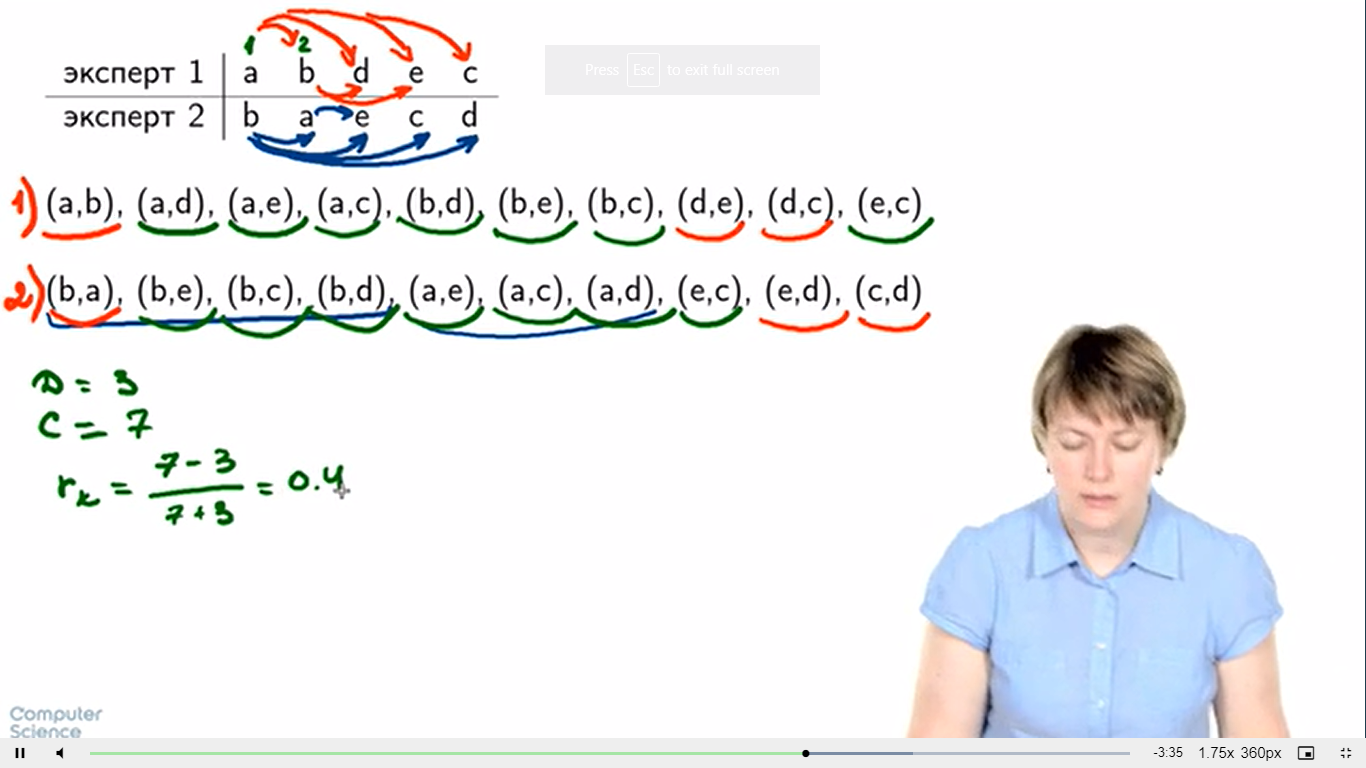

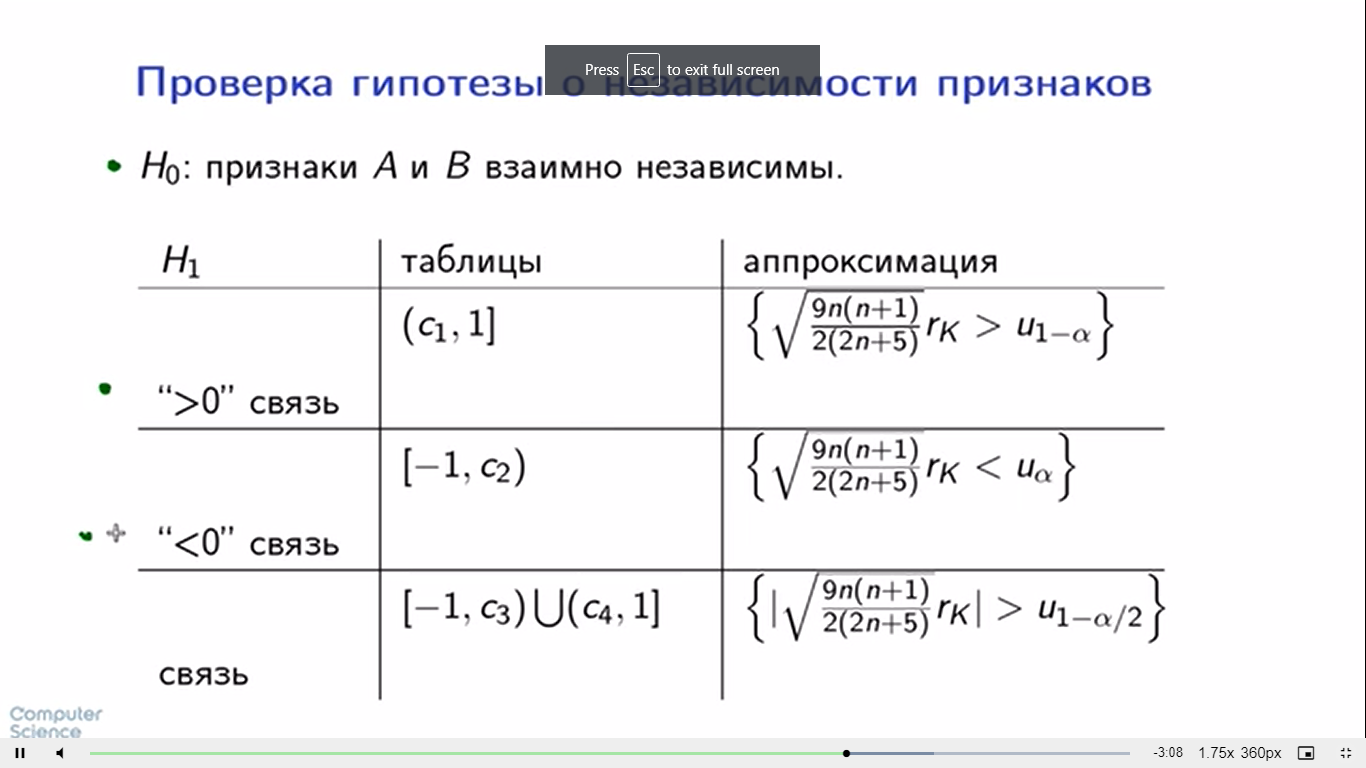

### Задание 4
С помощью двух алгоритмов ранжирования были отранжированы 10 документов.

d1,d2,d3,d4,d5,d6,d7,d8,d9,d10

Насколько сильно отличаются ранжировки данных алгоритмов?

1) d6 d2 d10 d8 d3 d9 d1 d5 d4 d7

2) d10 d6 d8 d2 d3 d9 d1 d5 d7 d4

Чтобы ответить на вопрос,  найдите коэффициент ранговой корреляции Кенделла

1: (6, 2), (6, 10), (6, 8), (6, 3), (6, 9), (6, 1), (6, 5), (6, 4), (6, 7), (2, 10), (2, 8), (2, 3), (2, 9), (2, 1), (2, 5), (6, 4), (6, 7)

2: (10, 

In [ ]:
X = [6, 2, 10, 8, 3, 9, 1, 5, 4, 7]
Y = [10, 6, 8, 2, 3, 9, 1, 5, 7, 4]
pairs_X = []
pairs_Y = []
for i in range(len(X)-1):
  for j in range(i+1,len(X)):
    pairs_X.append((X[i], X[j]))
    pairs_Y.append((Y[i], Y[j]))
C = len(set(pairs_X) & set(pairs_Y))
n = 10
N = n*(n+1)/2
D = N - C
r = (C - D)/(C + D)
r

0.4909090909090909

In [ ]:
stats.kendalltau(X, Y)

KendalltauResult(correlation=0.28888888888888886, pvalue=0.2912483465608466)

## 7.4 Задание на построение линейной регрессии

Условия

Постройте линейную регрессионную модель зависимости веса новорожденного от расы и образования матери, срока беременности, а также информации о курении матери во время беременности.

Данные

Формат файла: столбец 1: раса (1 – негроидная, 0 - другая), столбец 2: образование (от 0 до 16), столбец 3: курила ли (1 да, 0 нет), столбец 4: срок беременности (в неделях), столбец 5: вес новорожденного (в граммах) 

Пусть фиктивные переменные для расы и для курения принимают те же значения, что и сами переменные.

- Найдите оценку параметра $\beta_0$
​


In [ ]:
df = pd.read_csv('/content/weights.txt', sep='\t')
df

race  educ  smoke  preg  weight
0      1     8      0    39    3670
1      1     9      1    38    2775
2      1     9      0    38    2680
3      1     9      0    37    2699
4      1     9      1    38    2557
..   ...   ...    ...   ...     ...
95     0    16      0    38    3097
96     1    16      0    39    4091
97     1    16      0    40    3381
98     0    16      0    40    2727
99     0    15      0    39    3523

[100 rows x 5 columns]

In [ ]:
A = np.matrix(df[df.columns[:-1]].insert(0,'ones',np.ones(len(df))))
A

matrix([[None]], dtype=object)

In [ ]:
A=df[df.columns[:-1]]
A.insert(loc=0, column="ones", value=[1]*len(df))
A

ones  race  educ  smoke  preg
0      1     1     8      0    39
1      1     1     9      1    38
2      1     1     9      0    38
3      1     1     9      0    37
4      1     1     9      1    38
..   ...   ...   ...    ...   ...
95     1     0    16      0    38
96     1     1    16      0    39
97     1     1    16      0    40
98     1     0    16      0    40
99     1     0    15      0    39

[100 rows x 5 columns]

$Y, X=(X_1, X_2, ..., X_k)$

$y_i=\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+...+\beta_kx_{ik}, i = 1,...,n$

$E\varepsilon=0$
$K(\varepsilon_i\varepsilon_j)=0, i\not=j$

$ Y = A\beta+\varepsilon$ 
$Y = (Y_1, ..Y_n)^T, \beta=(\beta_1,...\beta_k)^T, \varepsilon=(\varepsilon_1, ..\varepsilon_n)^T,$

$A = ( 1 x_{11} x_{12} ... x_{1k})
 ( 1 x_{21} x_{22} ... x_{2k})$

 $(Y-A\beta)^T(Y-A\beta)=\sum(y_i-\beta_0-\beta_1x_{i1}-\beta_{k}x_{ik})^2->min_{\beta}$

 $(A^TA)\hat{\beta}=A^TY->\hat{\beta}=(A^TA)^{-1}A^TY$

In [ ]:
Y = df['weight']
beta = inv(np.matrix(A).T@np.matrix(A))@np.matrix(A).T@Y
beta[0]

-2841.3776761470103

- -2841.38

- Найдите оценку параметра при переменной раса

In [ ]:
beta[1]

-211.57152450694576